In [282]:
import numpy as np
import pandas as pd #for loading csv Excel files
import itertools #to merge lists
from scipy.interpolate import interp1d
from scipy.optimize import leastsq, curve_fit #for fitting
import matplotlib.pyplot as pl #for plots
from matplotlib import rc, rcParams
from scipy.special import kn #Modified Bessel function of the second kind of integer order n
from scipy.special import lambertw as prodlog #Modified Bessel function of the second kind of integer order n
import scipy.integrate as integrate #for (numerical) integrating
from scipy import optimize as opt #for numerical root finding

# Options for plotting

In [2]:
fontsize=26
legendfontsize=22
font = {'size' : fontsize}
rc('font',**font)
rc('text', usetex=True)
rc('font', family='serif', serif='Computer Modern Roman')

In [3]:
#Color palette accessible to colorblind people (see https://davidmathlogic.com/colorblind/)
lightblue='#1A85FF'
blue='#005AB5'
darkblue='#222255'
purple='#5D3A9B'
magenta='#AA4499'
red='#DC3220'
orange='#E66100'
yellow='#FFC20A'
green='#40B0A6'

colors=[lightblue,blue,darkblue,purple,magenta,red,orange,yellow,green]

In [4]:
goldenratio=1.61803398875 #Standard Python ratio for plot width/height=8/6.

# Constants

In [5]:
hbar=1.
c=2.99792458*10.**8.*10.**(-3.) #km/s (not m/s)
GeV_to_cmminus1=5.068*10.**13.
GeV_to_g=1.78*10.**(-24.)
fm_to_cm=10.**(-15.)*10.**2.
gammaE=0.5772156649015328606065120900824024310421 #Euler Mascheroni constant

# delta_l

## Approximate analytical solution for delta_l

In [68]:
def deltalappr(potential,alphaX,mX,mphi,l,v):
    if potential=='attractive':
        prefactor=-1.
    elif potential=='repulsive':
        prefactor=+1.
    #_____Variables_____
    #m=(mX/2.)  #reduced mass m
    #k=m*(v/c) #momentum k
    #r0=l/k
    a=(v/c)/(2*alphaX)
    b=alphaX*(mX/mphi)
    #_____deltalappr_____
    #deltalappr=(-1.)*prefactor*alphaX*(m/hbar**2)*(kn(0.,mphi*r0)/k)
    deltalappr=(-1.)*prefactor*(1./(2.*a))*kn(0.,l/(a*b))
    return deltalappr

potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
l=1
v=10 #km/s
print(deltalappr(potential,alphaX,mX,mphi,l,v))

411.64339210020086


## Numerical solution for delta_l

In [39]:
#_____Yukawa potential_____
def U(potential,alphaX,mphi,r):
    if potential=='attractive':
        prefactor=-1.
    elif potential=='repulsive':
        prefactor=+1.
    #U=prefactor*hbar*c*(alphaX/r)*np.exp(-(c/hbar)*mphi*r)
    U=prefactor*(alphaX/r)*np.exp(-mphi*r)
    return U

In [50]:
def deltal(potential,alphaX,mX,mphi,l,v):
    #_____Relations_____
    m=(mX/2.)  #reduced mass m
    p=m*(v/c) #momentum p
    k=p/hbar
    #E=(hbar**2.*k**2.)/(2.*m) #kinetic energy
    E=p**2./(2.*m) #kinetic energy
    #_____deltal integral_____
    #def integrand(r):
    #    return -(mX/hbar**2)*(U(potential,alphaX,mphi,r)/np.sqrt(k**2.-((l+1./2.)**2./r**2.)))
    #def integrand(r):
    #    return (1./hbar)*np.sqrt(hbar**2.*k**2.-2.*m*U(potential,alphaX,mphi,r)-(hbar**2.*(l+1./2.)**2.)/r**2.)-k ###Doesn't work well. Numerically very unstable.
    def integrand(r):
        x=1.-(r0**2./r**2)
        #x=k**2.-((l+1./2.)**2./r**2.)
        y=U(potential,alphaX,mphi,r)/(E*c**2)
        #y=2*m*U(potential,alphaX,mphi,r)
        #print([x,y])
        #print([np.sqrt(x-y),np.sqrt(x)])
        #return np.sqrt(x-y)-np.sqrt(x)
        #print([np.sqrt(1-y/x),1.])
        return np.sqrt(x)*(np.sqrt(1-y/x)-1.)
    r0=l/k
    #rmax=10**6 #.*r0 #Value cannot be smaller than this for l=1. Otherwise r0>rmax.
    rmax=10**2.*r0 #Value cannot be smaller than this for l=1. Otherwise r0>rmax.
    logging=False
    if logging:
        print([r0,rmax,rmax/r0])
        pl.xscale('log')
        #pl.yscale('log') 
        Rvals=np.logspace(np.log10(r0),np.log10(rmax),50)
        pl.plot(Rvals,[integrand(r) for r in Rvals])
        pl.show()
        pl.xscale('log')
        #pl.yscale('log')
        pl.plot(Rvals,[U(potential,alphaX,mphi,r) for r in Rvals])
        pl.show()
    #deltal=integrate.quad(integrand,r0,rmax,limit=200)[0] #,limit=200
    #deltalintegral=integrate.quad(integrand,r0,rmax,limit=500,points=r0)[0] #,limit=200
    #deltal=deltalintegral+(1./2.)*np.pi*(l+(1./2.))-k*r0
    #print([deltalintegral,(1./2.)*np.pi*(l+(1./2.))-k*r0])
    deltalintegral=integrate.quad(integrand,r0,rmax,limit=200)[0] #,limit=200
    deltal=k*c**2*deltalintegral
    return deltal

potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
l=1.
v=10. #km/s
print(deltalappr(potential,alphaX,mX,mphi,l,v))
print(deltal(potential,alphaX,mX,mphi,l,v))

-411.64339210020086
411.6420355129715


In [41]:
#vvals=np.logspace(np.log10(1.),np.log10(10.**4.),100)
vvals=np.logspace(np.log10(10.),np.log10(10.**4.),100)

l=1

[v,deltaappr,delta]:
[10.0, -411.64339210020086, 411.6420355129715]
[10.722672220103231, -401.8682712231668, 401.8685082167785]
[11.497569953977356, -391.68367962643094, 391.6858776950463]
[12.32846739442066, -381.16748156285183, 381.16460856544575]
[13.219411484660288, -370.39205597480753, 370.3925904872162]
[14.174741629268055, -359.42425877607076, 359.4229519838324]
[15.199110829529339, -348.3254649422658, 348.3245681799417]
[16.297508346206442, -337.15167553574, 337.14935554571787]
[17.47528400007684, -325.9536764220156, 325.9542648063798]
[18.73817422860384, -314.7772370349801, 314.7745875382316]
[20.09233002565047, -303.6633390768678, 303.6623133234414]
[21.544346900318846, -292.64842647004787, 292.6487043149671]
[23.101297000831604, -281.7646691942453, 281.7649914363241]
[24.770763559917114, -271.04023483664145, 271.0392849667081]
[26.560877829466868, -260.4995627510545, 260.49744584677217]
[28.48035868435802, -250.16363666820536, 250.16283283136036]
[30.538555088334157, -2

C:\Users\Laura Sagunski\Anaconda2\lib\site-packages\ipykernel_launcher.py:42: IntegrationWarning: The integral is probably divergent, or slowly convergent.



[v,deltaappr,delta]:
[10.0, -1.374292840564152e-129, 0.0]
[10.722672220103231, -7.903843612817646e-121, 0.0]
[11.497569953977356, -1.164651449363146e-112, 0.0]
[12.32846739442066, -4.819594814817039e-105, 0.0]
[13.219411484660288, -6.101744621198186e-98, 0.0]
[14.174741629268055, -2.5597243799775915e-91, 0.0]
[15.199110829529339, -3.833172530593038e-85, 0.0]
[16.297508346206442, -2.1963464845906456e-79, 0.0]
[17.47528400007684, -5.137358708503885e-74, 0.0]
[18.73817422860384, -5.21074178294619e-69, 0.0]
[20.09233002565047, -2.4245797970129868e-64, 0.0]
[21.544346900318846, -5.45455107762522e-60, 0.0]
[23.101297000831604, -6.230720310219179e-56, 0.0]
[24.770763559917114, -3.782785417962096e-52, 0.0]
[26.560877829466868, -1.2737372663823396e-48, 0.0]
[28.48035868435802, -2.4751202714219002e-45, 0.0]
[30.538555088334157, -2.8803934078099104e-42, 0.0]
[32.74549162877728, -2.078033866410123e-39, 0.0]
[35.11191734215131, -9.598284352528846e-37, 0.0]
[37.64935806792467, -2.9250036639003686e-

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


Plots/deltal.pdf exported.


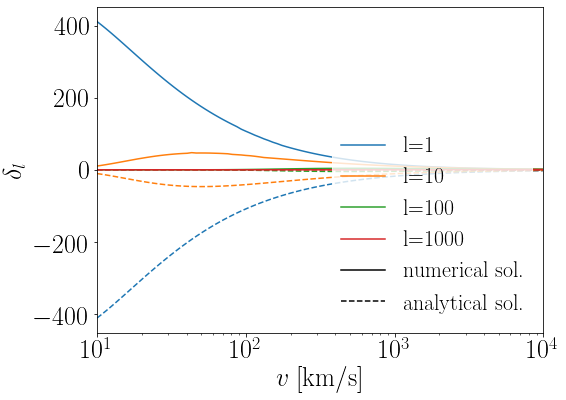

In [42]:
potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
lvals=[1,10,100,1000]
#lvals=[1000]

pl.figure(figsize=(8,6))
for i in range(0,len(lvals)):
    l=lvals[i]
    print('l='+str(l))
    color='C'+str(i)
    deltalvals=np.array([deltal(potential,alphaX,mX,mphi,l,v) for v in vvals])
    print()
    deltalapprvals=np.array([deltalappr(potential,alphaX,mX,mphi,l,v) for v in vvals])
    logging=True
    if logging==True:
        print('[v,deltaappr,delta]:')
        for i in range(0,len(vvals)):
            print([vvals[i],deltalapprvals[i],deltalvals[i]])
    pl.plot(vvals,deltalvals,linestyle='-',label='l='+str(l),color=color) 
    pl.plot(vvals,deltalapprvals,linestyle='--')
    if l==lvals[-1]:
        pl.plot([-10.,-10.],color='black',linestyle='-',label='numerical sol.')
        pl.plot([-1.,-10.],color='black',linestyle='--',label='analytical sol.')


pl.xlim([vvals[0],vvals[-1]])
#pl.ylim([-0.25,0.01])
pl.xscale('log')
#pl.yscale('log')    
pl.xlabel(r'$v\;{\rm [km/s]}$',fontsize=fontsize) 
pl.ylabel(r'$\delta_l$',fontsize=fontsize) 
pl.legend(loc='lower right',edgecolor='white',fontsize=legendfontsize)
pl.savefig('Plots/deltal.pdf',bbox_inches='tight')
print('Plots/deltal.pdf exported.')
pl.show()

In [11]:
# potential='attractive' #['attractive','repulsive']:
# alphaX=10.**(-2.)
# mX=200 #GeV
# mphi=10**(-3.) #GeV.
# #lvals=[1,5,10,50,100,1000]
# lvals=[1,10,100,1000]

# pl.figure(figsize=(8,6))
# for i in range(0,len(lvals)):
#     l=lvals[i]
#     #print('l='+str(l))
#     color='C'+str(i)
#     pl.plot(vvals,[deltal(potential,alphaX,mX,mphi,l,v) for v in vvals],linestyle='-',label='l='+str(l),color=color) 
#     pl.plot(vvals,[deltalappr(potential,alphaX,mX,mphi,l,v) for v in vvals],linestyle='--')
#     if l==lvals[-1]:
#         pl.plot([-10.,-10.],color='black',linestyle='-',label='numerical sol.')
#         pl.plot([-1.,-10.],color='black',linestyle='--',label='analytical sol.')


# pl.xlim([10.**2.,vvals[-1]])
# pl.ylim([-0.005,0.01])
# pl.xscale('log')
# #pl.yscale('log')    
# pl.xlabel(r'$v\;{\rm [km/s]}$',fontsize=fontsize) 
# pl.ylabel(r'$\delta_l$',fontsize=fontsize) 
# pl.legend(loc='best',edgecolor='white',fontsize=legendfontsize)    
# pl.show()

In [43]:
# potential='attractive' #['attractive','repulsive']:
# alphaX=10.**(-2.)
# mX=200 #GeV
# mphi=10**(-3.) #GeV.
# #lvals=[1,5,10,50,100,1000]
# lvals=[1,10,100,1000]

# pl.figure(figsize=(8,6))
# for i in range(0,len(lvals)):
#     l=lvals[i]
#     color='C'+str(i)
#     vdelta_deltalvals=[]
#     for j in range(0,len(vvals)):
#         v=vvals[j]
#         deltaapprval=deltalappr(potential,alphaX,mX,mphi,l,v)
#         deltaval=deltal(potential,alphaX,mX,mphi,l,v)
#         if not deltaval==0:
#             delta_deltal=(deltaapprval-deltaval)/deltaapprval
#             vdelta_deltalvals.append([v,delta_deltal])
#     vdelta_deltalvals=np.array(vdelta_deltalvals)
#     #pl.plot(vvals,[deltal(potential,alphaX,mX,mphi,l,v) for v in vvals],linestyle='-',label=str(l),color=color) 
#     #pl.plot(vvals,[100.*((deltalappr(potential,alphaX,mX,mphi,l,v)-deltal(potential,alphaX,mX,mphi,l,v))/deltalappr(potential,alphaX,mX,mphi,l,v)) for v in vvals],linestyle='-',label='l='+str(l),color=color)
#     #pl.plot(vvals,[(deltal(potential,alphaX,mX,mphi,l,v)-deltalappr(potential,alphaX,mX,mphi,l,v)) for v in vvals],linestyle='-',label=str(l),color=color)
#     pl.plot(vdelta_deltalvals[:,0],100.*vdelta_deltalvals[:,1],linestyle='-',label='l='+str(l),color=color)


# pl.xlim([vvals[0],vvals[-1]])
# #pl.ylim([40.,90.])
# pl.xscale('log')
# #pl.yscale('log')    
# pl.xlabel(r'$v\;{\rm [km/s]}$',fontsize=fontsize) 
# pl.ylabel(r'$\Delta \delta_l\; [\%]$',fontsize=fontsize) 
# pl.legend(loc='best',edgecolor='white',fontsize=legendfontsize) 
# pl.savefig('Plots/difference_deltal.pdf',bbox_inches='tight')
# print('Plots/difference_deltal.pdf exported.')
# pl.show()

## Comparison to Sean's data for delta_l

In [13]:
#_____[linenumber l, delta(l)]_____
#Values for deltal in Fig.2 in Sean's paper 1302.3898. mX=200 GeV, mphi=1 MeV=10**(-3) GeV, alphaX=10**(-2), v=1000 km/s.
deltaldata=np.loadtxt(r'C:\Users\Laura Sagunski\Laura Dropbox (1)\Laura Sagunski\Self-interaction cross section\DataDarkPhotonModel\deltaL_v1000.dat') #Need r'' to produce a raw string (alternatively replace all ...\... by ...\\...).
print(deltaldata)

[ 1.12523197 -0.12437827 -1.11121981 ...  0.01928939  0.01922529
  0.01916167]


In [14]:
lvals=np.array([float(l) for l in range(0,len(deltaldata))])
print(lvals)

[0.000e+00 1.000e+00 2.000e+00 ... 1.498e+03 1.499e+03 1.500e+03]


In [15]:
#Parameters from Fig.2 in Sean's paper 1302.3898. mX=200 GeV, mphi=1 MeV=10**(-3) GeV, alphaX=10**(-2), v=1000 km/s.
potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
v=1000. #km/s
deltalapprvals=np.array([deltalappr(potential,alphaX,mX,mphi,l,v) for l in lvals])
print(deltalapprvals)

[        -inf -17.76504785 -15.68716616 ...  -0.01938057  -0.01931641
  -0.01925246]


## delta_l

In [16]:
dldeltalDeltadeltal=[]
for l in range(1,len(lvals)): #For l=0: deltaappr=-np.inf.
    deltal=deltalappr(potential,alphaX,mX,mphi,l,v)
    n=int(abs(deltal)/(np.pi/2))
    deltalapprnew=abs(deltal)-n*(np.pi/2)
    epsilon=1. #np.pi/2. Due to numerical uncertainties the difference can be slightly smaller than np.pi/2 so that no sign change occurs.
    if deltalapprnew-deltaldata[l]>epsilon:
        deltalapprnew=deltalapprnew-np.pi/2
    output=[float(l),deltalapprnew,deltaldata[l],abs((deltaldata[l]-deltalapprnew)/deltaldata[l])]
    print(output)
    dldeltalDeltadeltal.append(output)
dldeltalDeltadeltal=np.array(dldeltalDeltadeltal)
print(dldeltalDeltadeltal)

[1.0, 0.4862882589777513, -0.12437827449718497, 4.909752414106351]
[2.0, -0.020797104262484822, -1.1112198142097587, 0.98128443715947]
[3.0, 0.33463074385451996, 1.2406234163140808, 0.7302721039647025]
[4.0, 1.0432216751084713, 0.5930058013661873, 0.759209897618305]
[5.0, 0.37455239327464795, 0.048877398565205954, 6.663100006743775]
[6.0, -0.17168416295858613, -0.41805274308123236, 0.5893241563416175]
[7.0, -0.63341755770238, -0.8258294812866838, 0.2329923161431781]
[8.0, -1.0332889699634524, -1.1871334676824528, 0.12959326133677188]
[9.0, -1.385902882617522, -1.5111083251233237, 0.08285669559499223]
[10.0, 1.4403611622922625, 1.3370734922078364, 0.0772490597460524]
[11.0, 1.1552048098960075, 1.0691087201336398, 0.08053071510969025]
[12.0, 0.8949684676643983, 0.8226267991755452, 0.0879398392580397]
[13.0, 0.6556633260562137, 0.5945141067738533, 0.10285579195788686]
[14.0, 0.4341886543703293, 0.38227646402506493, 0.1357975058120779]
[15.0, 0.2280862544194786, 0.18389025309362536, 0.2403

Plots/deltal_analytical_vs_numerical.pdf exported.


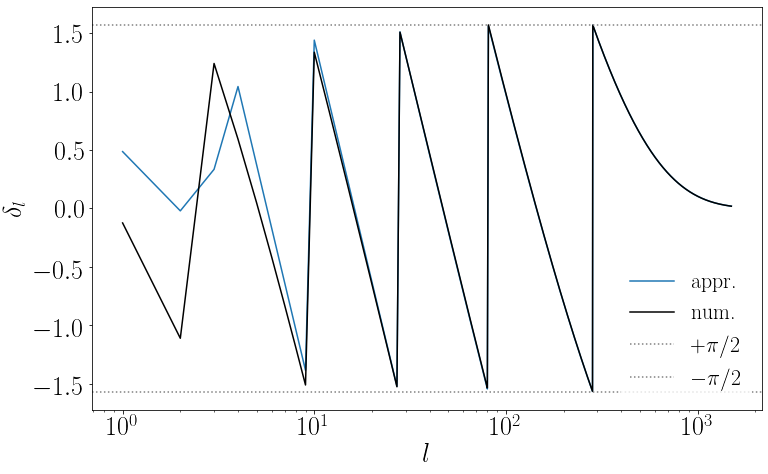

In [17]:
pl.figure(figsize=(12,12/goldenratio)) 
pl.plot(dldeltalDeltadeltal[:,0],dldeltalDeltadeltal[:,1],'-',label=r'appr.')
pl.plot(dldeltalDeltadeltal[:,0],dldeltalDeltadeltal[:,2],'-',color='black',label=r'num.')
pl.xscale('log')
pl.axhline(np.pi/2.,color='gray',linestyle=':',label=r'$+\pi/2$')
pl.axhline(-np.pi/2.,color='gray',linestyle=':',label=r'$-\pi/2$')
pl.xlabel(r'$l$',fontsize=fontsize) 
pl.ylabel(r'$\delta_l$',fontsize=fontsize) 
pl.legend(loc='lower right',edgecolor='white',fontsize=legendfontsize) 
pl.savefig('Plots/deltal_analytical_vs_numerical.pdf',bbox_inches='tight')
print('Plots/deltal_analytical_vs_numerical.pdf exported.')
pl.show()

No handles with labels found to put in legend.


Plots/Plots/Difference_deltal_analytical_vs_numerical.pdf exported.


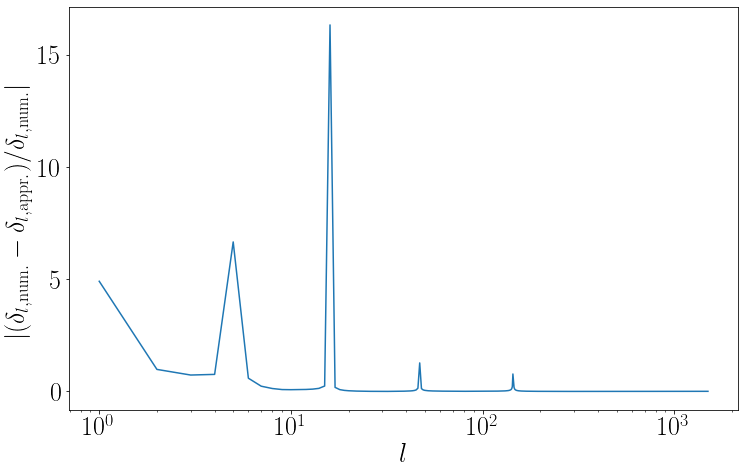

In [18]:
pl.figure(figsize=(12,12/goldenratio)) #Sophia's plot size.
pl.plot(dldeltalDeltadeltal[:,0],dldeltalDeltadeltal[:,3],'-')
pl.xscale('log')
#pl.yscale('log')
pl.xlabel(r'$l$',fontsize=fontsize) 
pl.ylabel(r'$\left|(\delta_{l,\rm num.}-\delta_{l,\rm appr.})/\delta_{l,\rm num.}\right|$',fontsize=fontsize) 
pl.legend(loc='lower right',edgecolor='white',fontsize=legendfontsize) 
pl.savefig('Plots/Difference_deltal_analytical_vs_numerical.pdf',bbox_inches='tight')
print('Plots/Plots/Difference_deltal_analytical_vs_numerical.pdf exported.')
pl.show()

No handles with labels found to put in legend.


Plots/Plots/Difference_deltal_analytical_vs_numerical_logscale.pdf exported.


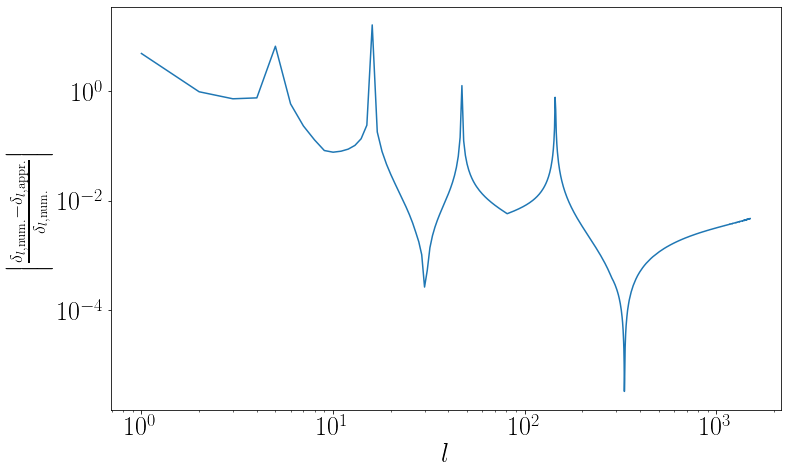

In [19]:
pl.figure(figsize=(12,12/goldenratio)) #Sophia's plot size.
pl.plot(dldeltalDeltadeltal[:,0],dldeltalDeltadeltal[:,3],'-')
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$l$',fontsize=fontsize) 
pl.ylabel(r'$\left|\frac{\delta_{l,\rm num.}-\delta_{l,\rm appr.}}{\delta_{l,\rm num.}}\right|$',fontsize=fontsize) 
pl.legend(loc='lower right',edgecolor='white',fontsize=legendfontsize) 
pl.savefig('Plots/Difference_deltal_analytical_vs_numerical_logscale.pdf',bbox_inches='tight')
print('Plots/Plots/Difference_deltal_analytical_vs_numerical_logscale.pdf exported.')
pl.show()

# delta_l+1-delta_l

## Approximate analytical solution for delta_l+1-delta_l~d delta_l/d l

In [219]:
def ddeltal_dl_appr(potential,alphaX,mX,mphi,l,v):
    if potential=='attractive':
        prefactor=+1.
    elif potential=='repulsive':
        prefactor=-1.
    #_____Variables_____
    a=(v/c)/(2*alphaX)
    b=alphaX*(mX/mphi)
    #_____ddeltal_dl_appr_____
    ddeltal_dl_appr=(-1.)*prefactor*(1./(2.*a**2.*b))*kn(1.,l/(a*b))
    return ddeltal_dl_appr

potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
l=1
v=10 #km/s
print(ddeltal_dl_appr(potential,alphaX,mX,mphi,l,v))

-274.8746242028307


In [52]:
#Parameters from Fig.2 in Sean's paper 1302.3898. mX=200 GeV, mphi=1 MeV=10**(-3) GeV, alphaX=10**(-2), v=1000 km/s.
potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
v=1000. #km/s
ddeltal_dl_apprvals=np.array([ddeltal_dl_appr(potential,alphaX,mX,mphi,l,v) for l in range(1,len(lvals)-1)])
print(ddeltal_dl_apprvals)

[-2.99783801 -1.49880783]


### Comparison d delta_l/d l with delta_l+1-delta_l

In [22]:
ddeltal_dl_vals=[]
for l in range(1,len(lvals)-1): 
    ddeltal_dl=deltaldata[l+1]-deltaldata[l] 
    epsilon=1. 
    if ddeltal_dl>1.:
        ddeltal_dl=ddeltal_dl-np.pi #2*np.pi/2.
        #print(ddeltal_dl)
    ddeltal_dl_vals.append(ddeltal_dl)
ddeltal_dl_vals=np.array(ddeltal_dl_vals)
print(ddeltal_dl_vals)

[-9.86841540e-01 -7.89749423e-01 -6.47617615e-01 ... -6.40027444e-05
 -6.41044972e-05 -6.36180280e-05]


In [23]:
print(ddeltal_dl_apprvals)

[-2.99783801e+00 -1.49880783e+00 -9.99092889e-01 ... -6.44883614e-05
 -6.42708970e-05 -6.40541838e-05]


In [24]:
print(ddeltal_dl_vals)

[-9.86841540e-01 -7.89749423e-01 -6.47617615e-01 ... -6.40027444e-05
 -6.41044972e-05 -6.36180280e-05]


Plots/ddeltal_dl_analytical_vs_numerical.pdf exported.


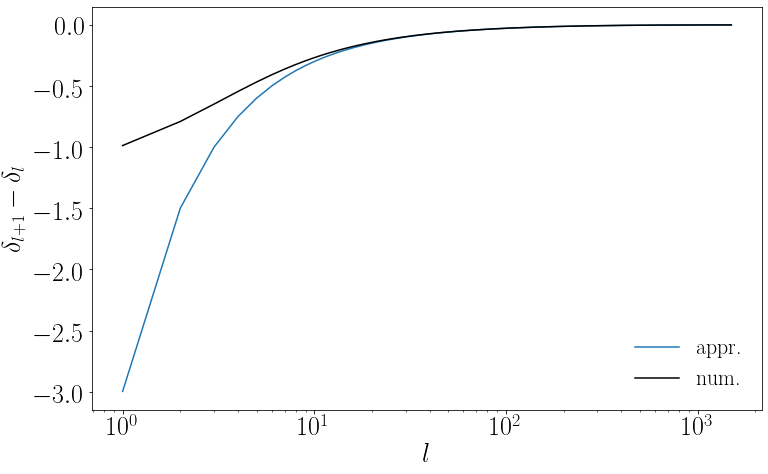

In [25]:
pl.figure(figsize=(12,12/goldenratio)) #Sophia's plot size.
pl.plot([l for l in range(1,len(lvals)-1)],ddeltal_dl_apprvals,'-',label='appr.')
pl.plot([l for l in range(1,len(lvals)-1)],ddeltal_dl_vals,'-',color='black',label='num.')

pl.xscale('log')
pl.xlabel(r'$l$',fontsize=fontsize) 
pl.ylabel(r'$\delta_{l+1}-\delta_{l}$',fontsize=fontsize) 
pl.legend(loc='lower right',edgecolor='white',fontsize=legendfontsize) 
pl.savefig('Plots/ddeltal_dl_analytical_vs_numerical.pdf',bbox_inches='tight')
print('Plots/ddeltal_dl_analytical_vs_numerical.pdf exported.')
pl.show()

No handles with labels found to put in legend.


Plots/Plots/Difference_ddeltal_dl_analytical_vs_numerical.pdf exported.


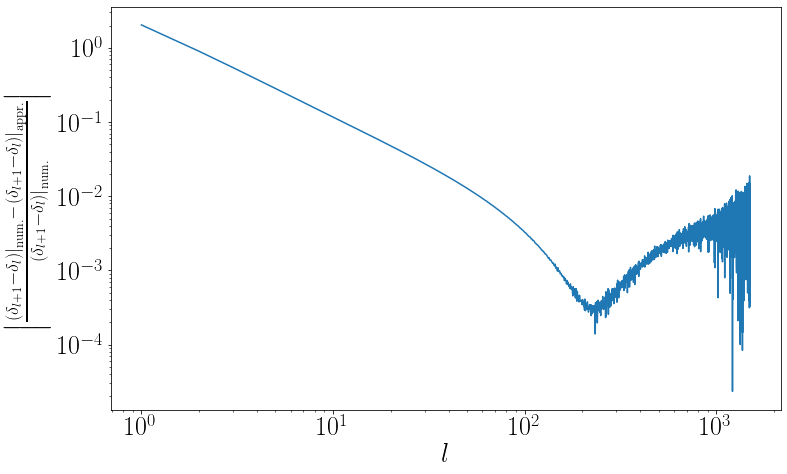

In [26]:
pl.figure(figsize=(12,12/goldenratio)) #Sophia's plot size.
pl.plot([l for l in range(1,len(lvals)-1)],abs((ddeltal_dl_vals-ddeltal_dl_apprvals)/ddeltal_dl_vals),'-')
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$l$',fontsize=fontsize) 
#pl.ylabel(r'$\Delta (\delta_{l+1}-\delta_{l})$',fontsize=fontsize) 
pl.ylabel(r'$\left|\frac{\left.(\delta_{l+1}-\delta_{l})\right|_{\rm num.}-\left.(\delta_{l+1}-\delta_{l})\right|_{\rm appr.}}{\left.(\delta_{l+1}-\delta_{l})\right|_{\rm num.}}\right|$',fontsize=fontsize) 
pl.legend(loc='lower right',edgecolor='white',fontsize=legendfontsize) 
pl.savefig('Plots/Difference_ddeltal_dl_analytical_vs_numerical.pdf',bbox_inches='tight')
print('Plots/Plots/Difference_ddeltal_dl_analytical_vs_numerical.pdf exported.')
pl.show()

## Numerical solution for r0

beta=1000.0
l=2
[r0appr,r0num]=[4.0, array(0.00080006)]


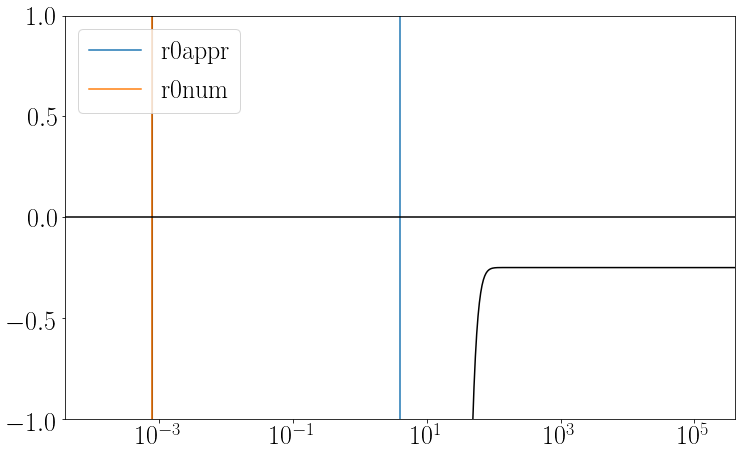

0.0008000639757845713
l=41
[r0appr,r0num]=[82.0, array(78.00810972)]


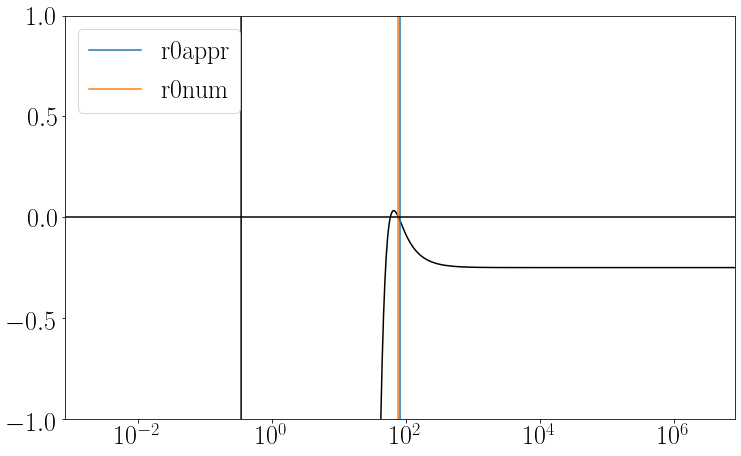

78.00810971684903
l=42
[r0appr,r0num]=[84.0, array(81.027456)]


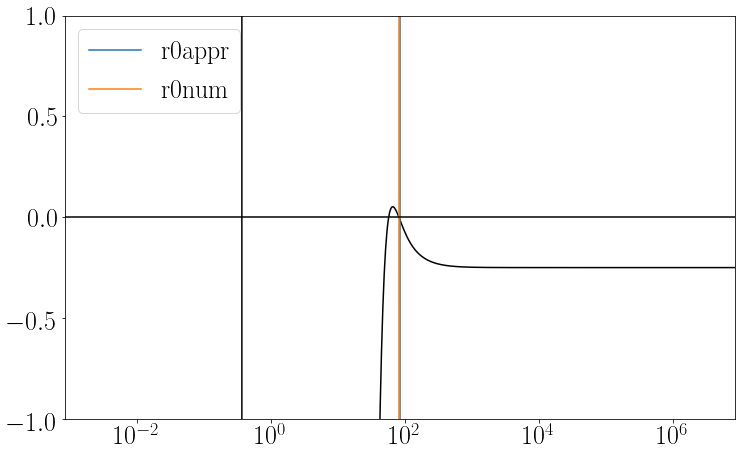

81.02745599674854


In [121]:
def r0num(potential,alphaX,mX,mphi,l,v,logging=False):
    #_____Relations_____
    m=(mX/2.)  #reduced mass m
    p=m*(v/c) #momentum p
    k=p/hbar
    #_____r0_____
    def r0(r):
        #return k**2.-l**2/r**2.+2*m*U(potential,alphaX,mphi,r)
        #print('[term1,term2]='+str([-l**2/r**2.,2*m*U(potential,alphaX,mphi,r)]))
        return (-1.)*(k**2.-l**2/r**2.-2*m*U(potential,alphaX,mphi,r))
    r0appr=l/k
    #[r0min,r0max]=[10.**(-5.)*r0appr,10.**(5.)*r0appr]
    #[r0min,r0max]=[10.**(-5.)*r0appr,r0appr]
    #r0num=opt.brentq(r0,r0min,r0max,maxiter=500) #Numerically unstable
    r0vals=np.logspace(np.log10(10.**(-5.)*r0appr),np.log10(10.**5.*r0appr),1000)
    r0index=list(itertools.chain.from_iterable(np.argwhere(r0(r0vals)>0)))[-1] #Find outermost solution
    #print(r0vals[r0index])
    #epsilon=10.**(-1.)
    epsilon=0.1
    [r0min,r0max]=[(1-epsilon)*r0vals[r0index],(1+epsilon)*r0vals[r0index]]
    r0valsnew=np.logspace(np.log10(r0min),np.log10(r0max),10000)
    r_r0Int=interp1d(r0(r0valsnew),r0valsnew,kind='linear')
    r0num=r_r0Int(0.)
    #print(r0num)
    if logging==True:
        print('[r0appr,r0num]='+str([r0appr,r0num]))
        pl.figure(figsize=(12,12/goldenratio)) #Sophia's plot size.
        #r0vals=np.logspace(np.log10(10.**(-5.)*r0appr),np.log10(10.**5.*r0appr),100)
        pl.plot(r0vals,r0(r0vals),color='black')
        #for r in r0vals:
        #    print([r,r0(r)])
        pl.axvline(r0appr,color='C0',label='r0appr')
        pl.axvline(r0num,color='C1',label='r0num')
        #pl.axvline(r0min,color='black',linestyle=':')
        #pl.axvline(r0max,color='black',linestyle=':')
        pl.axhline(0.,color='black')
        pl.legend(loc='upper left')
        pl.xscale('log')
        #pl.yscale('log')
        pl.xlim([r0vals[0],r0vals[-1]])
        pl.ylim([-1.,1.])
        #pl.ylim([-10000.,10000.])
        pl.show()
    return r0num

for beta in [1000.]:
    print('beta='+str(beta))
    for l in [2,41,42]:
        print('l='+str(l))
        #_____Fixed parameters_____
        potential='attractive'
        alphaX=0.1
        mphi=0.1 #GeV.
        #_____Parameters chosen such that 2ab=10 (classical regime 2ab>>1)_____
        mX=50.*beta
        #print(mX)
        v=(0.02/beta)*c #km/s
        #print(v)
        print(r0num(potential,alphaX,mX,mphi,l,v,logging=True))

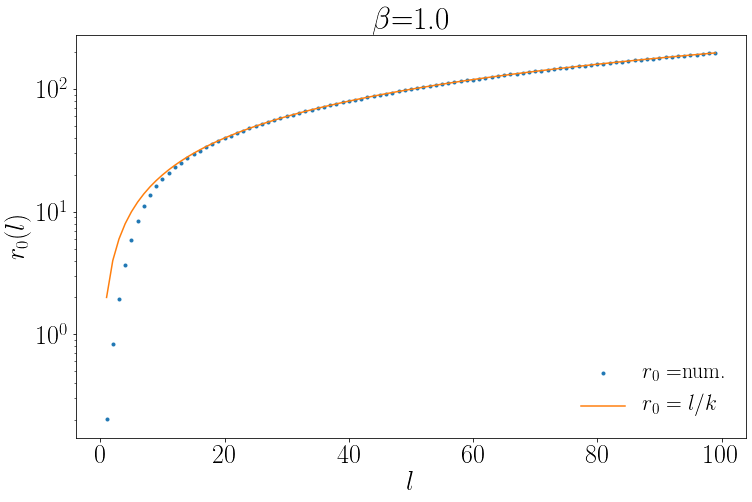

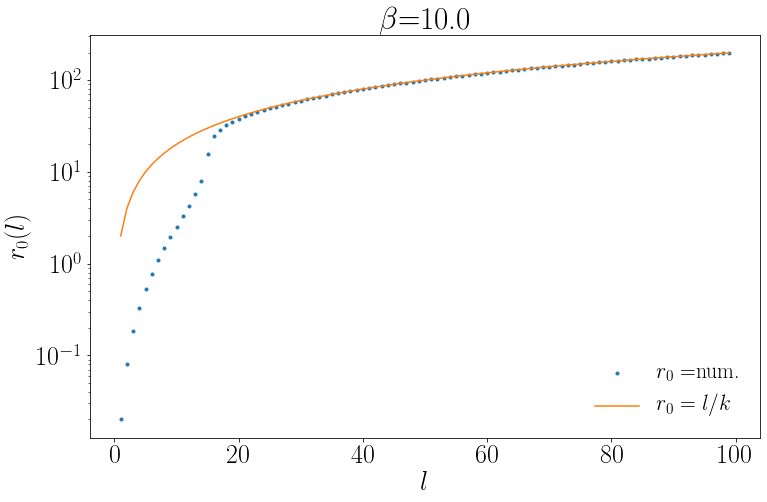

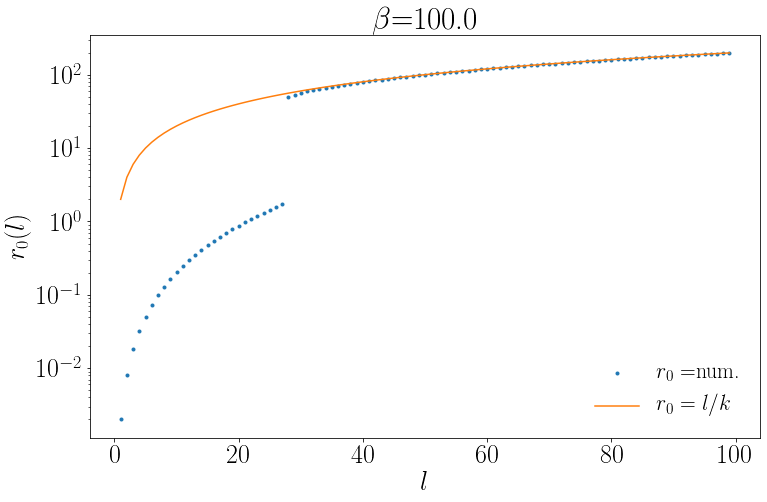

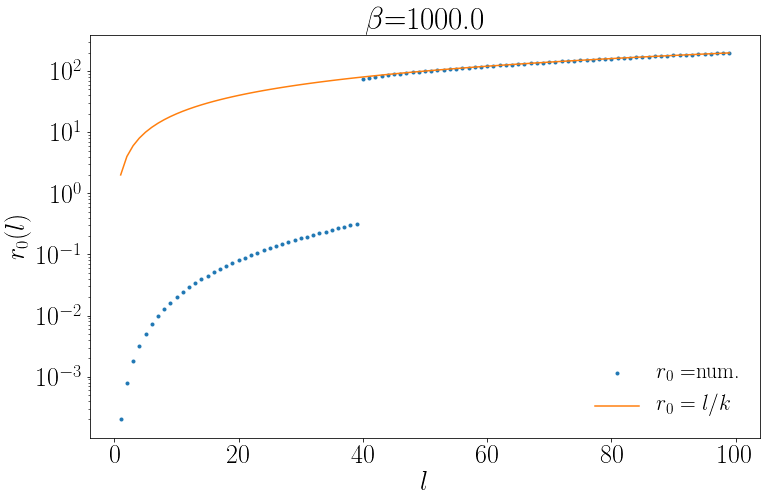

In [173]:
for beta in [1.,10.,100.,1000.]:
    #print('beta='+str(beta))
    #for l in [30,35,40.]:
    #print('l='+str(l))
    #_____Fixed parameters_____
    potential='attractive'
    alphaX=0.1
    mphi=0.1 #GeV.
    #_____Parameters chosen such that 2ab=10 (classical regime 2ab>>1)_____
    mX=50.*beta
    #print(mX)
    v=(0.02/beta)*c #km/s
    #print(v)
    #_____Relations_____
    m=(mX/2.)  #reduced mass m
    p=m*(v/c) #momentum p
    k=p/hbar
    #r0appr=l/k
    pl.figure(figsize=(12,12/goldenratio)) #Sophia's plot size.
    lvalsnew=np.array([l for l in range(1,100)]) #l=1,2,...,1500
    pl.plot(lvalsnew,[r0num(potential,alphaX,mX,mphi,l,v,logging=False) for l in lvalsnew],'.',label=r'$r_0=$num.')
    pl.plot(lvalsnew,[l/k for l in lvalsnew],label=r'$r_0=l / k$')
    #pl.xscale('log')
    pl.yscale('log')
    pl.xlabel(r'$l$',fontsize=fontsize)
    pl.ylabel(r'$r_{0}(l)$',fontsize=fontsize)
    #pl.ylim([10.**(-5.),10.**5.])
    pl.legend(loc='lower right',edgecolor='white',fontsize=legendfontsize) 
    pl.title(r'$\beta$='+str(beta))
    pl.show()

## Numerical solution for delta_l

In [154]:
def deltal(potential,alphaX,mX,mphi,l,v):
    #_____Relations_____
    m=(mX/2.)  #reduced mass m
    p=m*(v/c) #momentum p
    k=p/hbar
    #E=(hbar**2.*k**2.)/(2.*m) #kinetic energy
    E=p**2./(2.*m) #kinetic energy
    #_____deltal integral_____
    #def integrand(r):
    #    return -(mX/hbar**2)*(U(potential,alphaX,mphi,r)/np.sqrt(k**2.-((l+1./2.)**2./r**2.)))
    #def integrand(r):
    #    return (1./hbar)*np.sqrt(hbar**2.*k**2.-2.*m*U(potential,alphaX,mphi,r)-(hbar**2.*(l+1./2.)**2.)/r**2.)-k ###Doesn't work well. Numerically very unstable.
    def integrand(r):
        x=1.-(r0**2./r**2)
        #x=k**2.-((l+1./2.)**2./r**2.)
        y=U(potential,alphaX,mphi,r)/(E*c**2)
        #y=2*m*U(potential,alphaX,mphi,r)
        #print([x,y])
        #print([np.sqrt(x-y),np.sqrt(x)])
        #return np.sqrt(x-y)-np.sqrt(x)
        #print([np.sqrt(1-y/x),1.])
        return np.sqrt(x)*(np.sqrt(1-y/x)-1.)
    r0=l/k
    #rmax=10**6 #.*r0 #Value cannot be smaller than this for l=1. Otherwise r0>rmax.
    rmax=10**2.*r0 #Value cannot be smaller than this for l=1. Otherwise r0>rmax.
#     #rmax=10.**10.
#     #print([r0,rmax])
#     epsilon=10.**(-8.)
#     rvals=np.logspace(np.log10((1+epsilon)*r0),np.log10(rmax),5000.)
#     integrandvals=np.array([integrand(r) for r in rvals])
#     #print(integrandvals)
#     deltalintegral=np.trapz(integrandvals,x=rvals) #Trapezoidal rule is slower and less accurate.
    logging=False
    if logging:
        print([r0,rmax,rmax/r0])
        pl.xscale('log')
        #pl.yscale('log') 
        Rvals=np.logspace(np.log10(r0),np.log10(rmax),50)
        pl.plot(Rvals,[integrand(r) for r in Rvals])
        pl.show()
        pl.xscale('log')
        #pl.yscale('log')
        pl.plot(Rvals,[U(potential,alphaX,mphi,r) for r in Rvals])
        pl.show()
    #deltal=integrate.quad(integrand,r0,rmax,limit=200)[0] #,limit=200
    #deltalintegral=integrate.quad(integrand,r0,rmax,limit=500,points=r0)[0] #,limit=200
    #deltal=deltalintegral+(1./2.)*np.pi*(l+(1./2.))-k*r0
    #print([deltalintegral,(1./2.)*np.pi*(l+(1./2.))-k*r0])
    #deltalintegral=integrate.quad(integrand,r0,rmax,limit=500,epsabs=5.*10.**(-7.), epsrel=5*10.**(-1.))[0]
    deltalintegral=integrate.quad(integrand,r0,rmax)[0]
    deltal=k*c**2*deltalintegral
    return deltal

potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
l=1.
v=10. #km/s
print(deltalappr(potential,alphaX,mX,mphi,l,v))
print(deltal(potential,alphaX,mX,mphi,l,v))

411.64339210020086
411.6420355129715


In [153]:
def deltalr0num(potential,alphaX,mX,mphi,l,v):
    #_____Relations_____
    m=(mX/2.)  #reduced mass m
    p=m*(v/c) #momentum p
    k=p/hbar
    #E=(hbar**2.*k**2.)/(2.*m) #kinetic energy
    E=p**2./(2.*m) #kinetic energy
    #_____deltal integral_____
    #def integrand(r):
    #    return -(mX/hbar**2)*(U(potential,alphaX,mphi,r)/np.sqrt(k**2.-((l+1./2.)**2./r**2.)))
    #def integrand(r):
    #    return (1./hbar)*np.sqrt(hbar**2.*k**2.-2.*m*U(potential,alphaX,mphi,r)-(hbar**2.*(l+1./2.)**2.)/r**2.)-k ###Doesn't work well. Numerically very unstable.
    def integrand(r):
        x=1.-(r0**2./r**2)
        #x=k**2.-((l+1./2.)**2./r**2.)
        y=U(potential,alphaX,mphi,r)/(E*c**2)
        #y=2*m*U(potential,alphaX,mphi,r)
        #print([x,y])
        #print([np.sqrt(x-y),np.sqrt(x)])
        #return np.sqrt(x-y)-np.sqrt(x)
        #print([np.sqrt(1-y/x),1.])
        return np.sqrt(x)*(np.sqrt(1-y/x)-1.)
    #r0=l/k
    r0=r0num(potential,alphaX,mX,mphi,l,v)
    #rmax=10**6 #.*r0 #Value cannot be smaller than this for l=1. Otherwise r0>rmax.
    rmax=10**2.*r0 #Value cannot be smaller than this for l=1. Otherwise r0>rmax.
#     #rmax=10.**10.
#     #print([r0,rmax])
#     epsilon=10.**(-8.)
#     rvals=np.logspace(np.log10((1+epsilon)*r0),np.log10(rmax),5000.)
#     integrandvals=np.array([integrand(r) for r in rvals])
#     #print(integrandvals)
#     deltalintegral=np.trapz(integrandvals,x=rvals) #Trapezoidal rule is slower and less accurate.
    logging=False
    if logging:
        print([r0,rmax,rmax/r0])
        pl.xscale('log')
        #pl.yscale('log') 
        Rvals=np.logspace(np.log10(r0),np.log10(rmax),50)
        pl.plot(Rvals,[integrand(r) for r in Rvals])
        pl.show()
        pl.xscale('log')
        #pl.yscale('log')
        pl.plot(Rvals,[U(potential,alphaX,mphi,r) for r in Rvals])
        pl.show()
    #deltal=integrate.quad(integrand,r0,rmax,limit=200)[0] #,limit=200
    #deltalintegral=integrate.quad(integrand,r0,rmax,limit=500,points=r0)[0] #,limit=200
    #deltal=deltalintegral+(1./2.)*np.pi*(l+(1./2.))-k*r0
    #print([deltalintegral,(1./2.)*np.pi*(l+(1./2.))-k*r0])
    #deltalintegral=integrate.quad(integrand,r0,rmax,limit=500,epsabs=5.*10.**(-7.), epsrel=5*10.**(-1.))[0]
    deltalintegral=integrate.quad(integrand,r0,rmax)[0]
    deltal=k*c**2*deltalintegral
    return deltal

potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
l=1.
v=10. #km/s
print(deltalappr(potential,alphaX,mX,mphi,l,v))
print(deltal(potential,alphaX,mX,mphi,l,v))
print(deltalr0num(potential,alphaX,mX,mphi,l,v))

411.64339210020086
411.6420355129715
1573.5584834851913


In [48]:
# def ddeltaldldirect(potential,alphaX,mX,mphi,l,v):
#     #_____Relations_____
#     m=(mX/2.)  #reduced mass m
#     p=m*(v/c) #momentum p
#     k=p/hbar
#     #E=(hbar**2.*k**2.)/(2.*m) #kinetic energy
#     E=p**2./(2.*m) #kinetic energy
#     #_____d deltal / dl integral_____
#     def integrand(r):
#         #x=1.-(l**2./(k**2.*r**2))
#         x=1.-(r0**2./r**2)
#         y=U(potential,alphaX,mphi,r)/(E*c**2)
#         return 1/(r**2*np.sqrt(x-y))
#     r0=l/k
#     #rmax=10**6 #.*r0 #Value cannot be smaller than this for l=1. Otherwise r0>rmax.
#     rmax=10**2.*r0 #Value cannot be smaller than this for l=1. Otherwise r0>rmax.
# #     #rmax=10.**10.
# #     #print([r0,rmax])
# #     epsilon=10.**(-8.)
# #     rvals=np.logspace(np.log10((1+epsilon)*r0),np.log10(rmax),5000.)
# #     integrandvals=np.array([integrand(r) for r in rvals])
# #     #print(integrandvals)
# #     deltalintegral=np.trapz(integrandvals,x=rvals) #Trapezoidal rule is slower and less accurate.
#     logging=False
#     if logging:
#         print([r0,rmax,rmax/r0])
#         pl.xscale('log')
#         #pl.yscale('log') 
#         Rvals=np.logspace(np.log10(r0),np.log10(rmax),50)
#         pl.plot(Rvals,[integrand(r) for r in Rvals])
#         pl.show()
#         pl.xscale('log')
#         #pl.yscale('log')
#         pl.plot(Rvals,[U(potential,alphaX,mphi,r) for r in Rvals])
#         pl.show()
#     ddeltaldlintegral=integrate.quad(integrand,r0,rmax,limit=500,epsabs=5.*10.**(-7.), epsrel=5*10.**(-1.))[0]
#     #deltal=(l/k)*ddeltaldlintegral+np.pi/2
#     deltal=r0*ddeltaldlintegral+np.pi/2
#     return deltal

# potential='attractive' #['attractive','repulsive']:
# alphaX=10.**(-2.)
# mX=200 #GeV
# mphi=10**(-3.) #GeV.
# l=1.
# v=10. #km/s
# print(ddeltaldldirect(potential,alphaX,mX,mphi,l,v))
# print(ddeltaldl(potential,alphaX,mX,mphi,l,v))

3.1315883011213375


NameError: name 'ddeltaldl' is not defined

### delta_l as a function of beta

In [139]:
def deltal_beta(l,beta):
    #_____Fixed parameters_____
    potential='attractive'
    alphaX=0.1
    mphi=0.1 #GeV.
    #_____Parameters chosen such that 2ab=10 (classical regime 2ab>>1)_____
    mX=50.*beta
    #print(mX)
    v=(0.02/beta)*c #km/s
    #print(v)
    return deltal(potential,alphaX,mX,mphi,l,v)
    
for beta in [1000.]:
    for l in [2]:
        print(deltal_beta(l,beta))

5572.642713992434


In [140]:
def deltalr0num_beta(l,beta):
    #_____Fixed parameters_____
    potential='attractive'
    alphaX=0.1
    mphi=0.1 #GeV.
    #_____Parameters chosen such that 2ab=10 (classical regime 2ab>>1)_____
    mX=50.*beta
    #print(mX)
    v=(0.02/beta)*c #km/s
    #print(v)
    return deltalr0num(potential,alphaX,mX,mphi,l,v)
    
for beta in [1000.]:
    for l in [2]:
        print(deltalr0num_beta(l,beta))

26442.901292818507


In [150]:
def deltalappr_beta(l,beta):
    #_____Fixed parameters_____
    potential='attractive'
    alphaX=0.1
    mphi=0.1 #GeV.
    #_____Parameters chosen such that 2ab=10 (classical regime 2ab>>1)_____
    mX=50.*beta
    #print(mX)
    v=(0.02/beta)*c #km/s
    #print(v)
    return deltalappr(potential,alphaX,mX,mphi,l,v)

#for beta in [1.,10.,100.,1000.]:
for beta in [1.,1000.]:
    for l in [1]:
        print(deltalappr_beta(l,beta))

8.76351927764073
8763.519277640731


In [157]:
def deltalapprr0num(potential,alphaX,mX,mphi,l,v):
    if potential=='attractive':
        prefactor=-1.
    elif potential=='repulsive':
        prefactor=+1.
    #_____Variables_____
    #m=(mX/2.)  #reduced mass m
    #k=m*(v/c) #momentum k
    #r0=l/k
    a=(v/c)/(2*alphaX)
    b=alphaX*(mX/mphi)
    #_____deltalappr_____
    r0=r0num(potential,alphaX,mX,mphi,l,v)
    #deltalappr=(-1.)*prefactor*alphaX*(m/hbar**2)*(kn(0.,mphi*r0)/k)
    #deltalappr=(-1.)*prefactor*(1./(2.*a))*kn(0.,l/(a*b))
    deltalappr=(-1.)*prefactor*(1./(2.*a))*kn(0.,mphi*r0)
    return deltalappr

potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
l=1
v=10 #km/s
print(deltalappr(potential,alphaX,mX,mphi,l,v))
print(deltalapprr0num(potential,alphaX,mX,mphi,l,v))

411.64339210020086
2313.299652757894


In [160]:
def deltalapprr0num_beta(l,beta):
    #_____Fixed parameters_____
    potential='attractive'
    alphaX=0.1
    mphi=0.1 #GeV.
    #_____Parameters chosen such that 2ab=10 (classical regime 2ab>>1)_____
    mX=50.*beta
    #print(mX)
    v=(0.02/beta)*c #km/s
    #print(v)
    return deltalapprr0num(potential,alphaX,mX,mphi,l,v)


#for beta in [1.,10.,100.,1000.]:
for beta in [1.]:
    for l in [1]:
        print(deltalappr_beta(l,beta))
        print(deltalapprr0num_beta(l,beta))

8.76351927764073
20.09259901887871


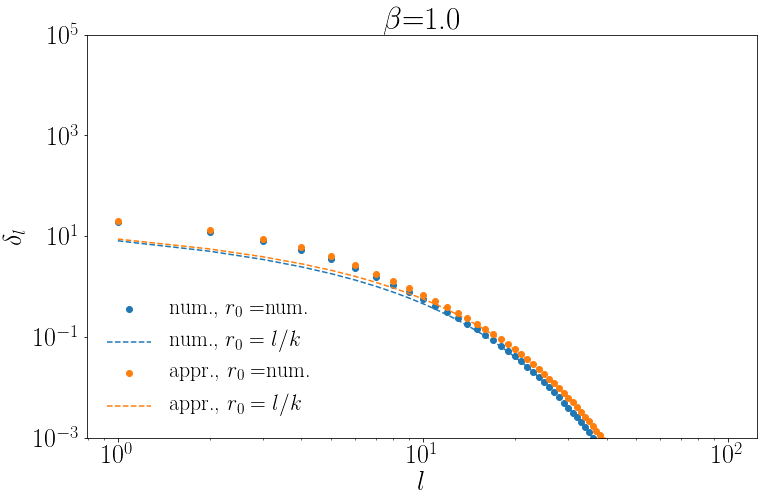

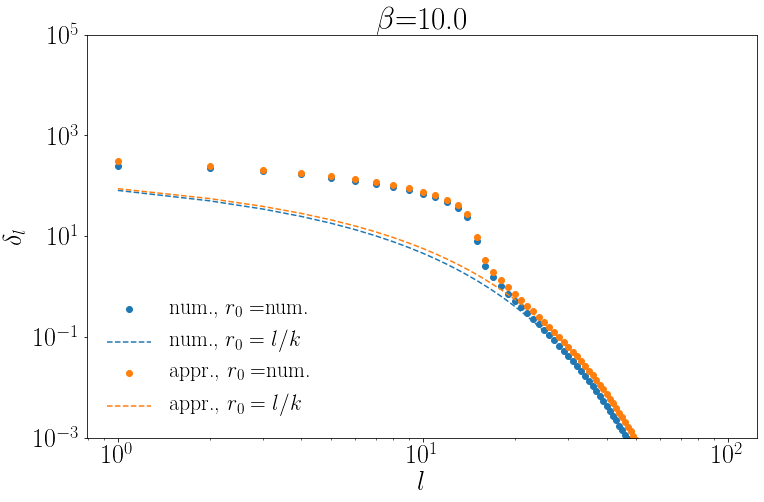

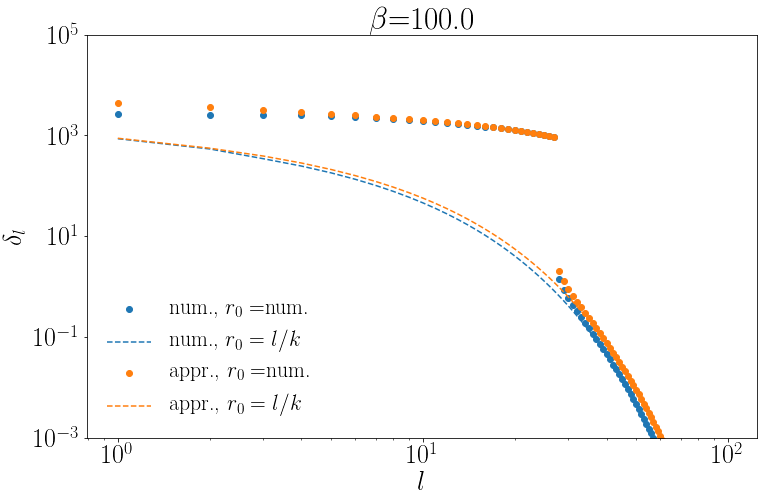

C:\Users\Laura Sagunski\Anaconda2\lib\site-packages\ipykernel_launcher.py:50: IntegrationWarning: The integral is probably divergent, or slowly convergent.


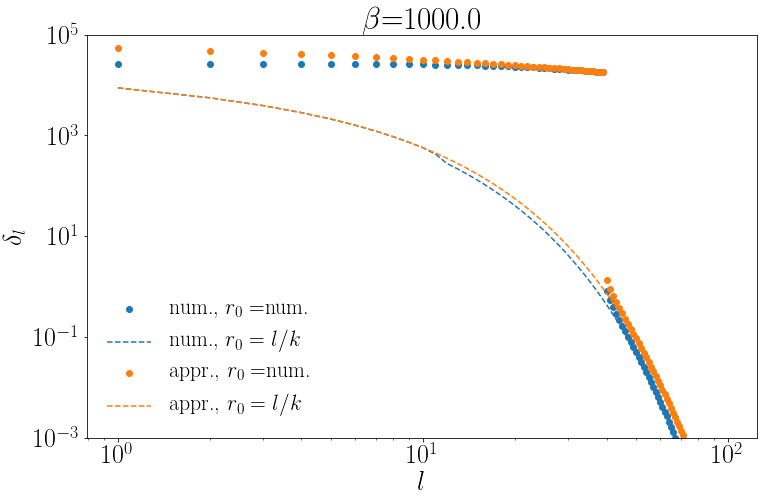

In [246]:
lvalsnew=np.array([l for l in range(1,100)]) #l=1,2,...,1500
#print(lvalsnew)

for beta in [1.,10.,100.,1000.]:
#for beta in [1000.]:
    pl.figure(figsize=(12,12/goldenratio)) #Sophia's plot size.
    
    deltalr0num_betavals=np.array([[l,deltalr0num_beta(l,beta)] for l in lvalsnew])
    pl.plot(deltalr0num_betavals[:,0],deltalr0num_betavals[:,1],'o',color='C0',label='num., $r_0=$num.')
    
    deltal_betavals=np.array([[l,deltal_beta(l,beta)] for l in lvalsnew])
    ##print(deltal_betavals)
    pl.plot(deltal_betavals[:,0],deltal_betavals[:,1],color='C0',linestyle='--',label='num., $r_0=l / k$')
    
    pl.plot(lvalsnew,[deltalapprr0num_beta(l,beta) for l in lvalsnew],'o',color='C1',label=r'appr., $r_0=$num.')
    
    pl.plot(lvalsnew,[deltalappr_beta(l,beta) for l in lvalsnew],color='C1',linestyle='--',label=r'appr., $r_0=l / k$')
   
    pl.xscale('log')
    pl.yscale('log')
    pl.xlabel(r'$l$',fontsize=fontsize)
    pl.ylim([10.**(-3.),10.**5.])
    #pl.ylabel(r'$\Delta (\delta_{l+1}-\delta_{l})$',fontsize=fontsize) 
    pl.ylabel(r'$\delta_{l}$',fontsize=fontsize) 
    pl.legend(loc='lower left',edgecolor='white',fontsize=legendfontsize) 
    pl.title(r'$\beta$='+str(beta))
    #pl.savefig('Plots/ddeltal_dl_beta'+str(beta)+'.pdf',bbox_inches='tight')
    #print('PPlots/ddeltal_dl_beta'+str(beta)+'.pdf exported.')
    pl.show()

## Numerical solution for d delta_l/ d l

In [184]:
# def ddeltaldl(potential,alphaX,mX,mphi,l,v):
#     #_____deltal_____
#     def deltal_l(l):
#         return deltal(potential,alphaX,mX,mphi,l,v)
#     #_____d deltal/dl_____
#     #epsilon = 10.**(-10.)
#     epsilon = 10.**(-2.) #Inaccurate, derivative depends on choice of epsilon.
#     deltal1=deltal_l((1.-epsilon)*l)
#     deltal2=deltal_l((1.+epsilon)*l)
#     #deltalavg=(deltal1+deltal2)/2. #In principle need to use ddeltaldlavg instead of ddeltaldl to be consistent with derivative, but values are very close.
#     #print([deltal_l(l),deltalavg])
#     ddeltaldl=(deltal2-deltal1)/(2.*epsilon*l)
# #     lvalsnew=np.array([l for l in range(1,1500)]) #l=1,2,...,1500
# #     deltalvals=np.array([deltal_l(l) for l in lvalsnew])
# #     ddeltaldlvals=np.gradient(deltalvals,lvalsnew)
# #     lindex=list(itertools.chain.from_iterable(np.argwhere(lvalsnew==l)))[0]
# #     #print(lindex)
# #     ddeltaldl=ddeltaldlvals[lindex]
#     return ddeltaldl

# potential='attractive' #['attractive','repulsive']:
# alphaX=10.**(-2.)
# mX=200 #GeV
# mphi=10**(-3.) #GeV.
# l=1.
# v=10. #km/s
# print(ddeltaldl(potential,alphaX,mX,mphi,l,v))

In [199]:
def ddeltaldl(potential,alphaX,mX,mphi,lvals,v):
    #_____deltal_____
    def deltal_l(l):
        return deltal(potential,alphaX,mX,mphi,l,v)
    #_____d deltal/dl_____
    deltalvals=np.array([deltal_l(l) for l in lvals])
    ddeltaldlvals=np.gradient(deltalvals,lvals)
    lddeltaldlvals=np.array([[lvals[i],ddeltaldlvals[i]] for i in range(0,len(lvals))])
    return lddeltaldlvals

potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
#l=1.
v=10. #km/s
lvalsnew=np.array([l for l in range(1,100)]) #l=1,2,...,1500
#print(lvalsnew)
#print(ddeltaldl(potential,alphaX,mX,mphi,lvalsnew,v))

In [203]:
def ddeltaldl_beta(lvals,beta):
    #_____Fixed parameters_____
    potential='attractive'
    alphaX=0.1
    mphi=0.1 #GeV.
    #_____Parameters chosen such that 2ab=10 (classical regime 2ab>>1)_____
    mX=50.*beta
    #print(mX)
    v=(0.02/beta)*c #km/s
    #print(v)
    return ddeltaldl(potential,alphaX,mX,mphi,lvals,v)
    
for beta in [1.,10.,100.,1000.]:
    for lvals in [lvalsnew]:
        print(ddeltaldl_beta(lvals,beta))
        #pl.plot(ddeltaldl_beta(lvals,beta))
        #pl.show()

[[ 1.00000000e+00 -3.07143370e+00]
 [ 2.00000000e+00 -2.32923269e+00]
 [ 3.00000000e+00 -1.28390136e+00]
 [ 4.00000000e+00 -8.18184788e-01]
 [ 5.00000000e+00 -5.57046427e-01]
 [ 6.00000000e+00 -3.94296622e-01]
 [ 7.00000000e+00 -2.86132420e-01]
 [ 8.00000000e+00 -2.11225807e-01]
 [ 9.00000000e+00 -1.57998779e-01]
 [ 1.00000000e+01 -1.19402813e-01]
 [ 1.10000000e+01 -9.10618406e-02]
 [ 1.20000000e+01 -6.96674189e-02]
 [ 1.30000000e+01 -5.36866385e-02]
 [ 1.40000000e+01 -4.16464260e-02]
 [ 1.50000000e+01 -3.22358165e-02]
 [ 1.60000000e+01 -2.53823210e-02]
 [ 1.70000000e+01 -1.97437669e-02]
 [ 1.80000000e+01 -1.53361447e-02]
 [ 1.90000000e+01 -1.21903598e-02]
 [ 2.00000000e+01 -9.51071518e-03]
 [ 2.10000000e+01 -7.40845882e-03]
 [ 2.20000000e+01 -5.95247945e-03]
 [ 2.30000000e+01 -4.84939548e-03]
 [ 2.40000000e+01 -3.73275556e-03]
 [ 2.50000000e+01 -2.79872753e-03]
 [ 2.60000000e+01 -2.31521088e-03]
 [ 2.70000000e+01 -1.87105121e-03]
 [ 2.80000000e+01 -1.54516354e-03]
 [ 2.90000000e+01 -1

C:\Users\Laura Sagunski\Anaconda2\lib\site-packages\ipykernel_launcher.py:50: IntegrationWarning: The integral is probably divergent, or slowly convergent.


In [200]:
def ddeltaldlr0num(potential,alphaX,mX,mphi,lvals,v):
    #_____deltal_____
    def deltal_l(l):
        return deltalr0num(potential,alphaX,mX,mphi,l,v)
    #_____d deltal/dl_____
    deltalvals=np.array([deltal_l(l) for l in lvals])
    ddeltaldlvals=np.gradient(deltalvals,lvals)
    lddeltaldlvals=np.array([[lvals[i],ddeltaldlvals[i]] for i in range(0,len(lvals))])
    return lddeltaldlvals

potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
#l=1.
v=10. #km/s
lvalsnew=np.array([l for l in range(1,100)]) #l=1,2,...,1500
#print(lvalsnew)
#print(ddeltaldlr0num(potential,alphaX,mX,mphi,lvalsnew,v))

In [220]:
def ddeltaldlr0num_beta(lvals,beta):
    #_____Fixed parameters_____
    potential='attractive'
    alphaX=0.1
    mphi=0.1 #GeV.
    #_____Parameters chosen such that 2ab=10 (classical regime 2ab>>1)_____
    mX=50.*beta
    #print(mX)
    v=(0.02/beta)*c #km/s
    #print(v)
    return ddeltaldlr0num(potential,alphaX,mX,mphi,lvals,v)
    
for beta in [1.,10.,100.,1000.]:
    for lvals in [lvalsnew]:
        print(ddeltaldlr0num_beta(lvals,beta))
        #pl.plot(ddeltaldlr0num_beta(lvals,beta))
        #pl.show()

[[ 1.00000000e+00 -6.76237643e+00]
 [ 2.00000000e+00 -5.42955688e+00]
 [ 3.00000000e+00 -3.44326756e+00]
 [ 4.00000000e+00 -2.34555176e+00]
 [ 5.00000000e+00 -1.56103862e+00]
 [ 6.00000000e+00 -9.86903099e-01]
 [ 7.00000000e+00 -6.11574276e-01]
 [ 8.00000000e+00 -3.87483091e-01]
 [ 9.00000000e+00 -2.55035857e-01]
 [ 1.00000000e+01 -1.74159582e-01]
 [ 1.10000000e+01 -1.22569911e-01]
 [ 1.20000000e+01 -8.83132352e-02]
 [ 1.30000000e+01 -6.49044137e-02]
 [ 1.40000000e+01 -4.82966701e-02]
 [ 1.50000000e+01 -3.64727288e-02]
 [ 1.60000000e+01 -2.78973776e-02]
 [ 1.70000000e+01 -2.12608810e-02]
 [ 1.80000000e+01 -1.63927040e-02]
 [ 1.90000000e+01 -1.27972637e-02]
 [ 2.00000000e+01 -9.84341275e-03]
 [ 2.10000000e+01 -7.73186835e-03]
 [ 2.20000000e+01 -6.19362566e-03]
 [ 2.30000000e+01 -4.77545399e-03]
 [ 2.40000000e+01 -3.83060102e-03]
 [ 2.50000000e+01 -3.00049318e-03]
 [ 2.60000000e+01 -2.30751537e-03]
 [ 2.70000000e+01 -1.86525595e-03]
 [ 2.80000000e+01 -1.54059974e-03]
 [ 2.90000000e+01 -1

[[ 1.00000000e+00 -3.01080120e+01]
 [ 2.00000000e+00 -3.84900081e+01]
 [ 3.00000000e+00 -5.71022849e+01]
 [ 4.00000000e+00 -7.72152644e+01]
 [ 5.00000000e+00 -9.65959535e+01]
 [ 6.00000000e+00 -1.15213247e+02]
 [ 7.00000000e+00 -1.33063081e+02]
 [ 8.00000000e+00 -1.50113968e+02]
 [ 9.00000000e+00 -1.66318852e+02]
 [ 1.00000000e+01 -1.81626613e+02]
 [ 1.10000000e+01 -1.95988865e+02]
 [ 1.20000000e+01 -2.09363508e+02]
 [ 1.30000000e+01 -2.21716933e+02]
 [ 1.40000000e+01 -2.33024818e+02]
 [ 1.50000000e+01 -2.43272474e+02]
 [ 1.60000000e+01 -2.52455088e+02]
 [ 1.70000000e+01 -2.60577295e+02]
 [ 1.80000000e+01 -2.67652811e+02]
 [ 1.90000000e+01 -2.73703750e+02]
 [ 2.00000000e+01 -2.78759921e+02]
 [ 2.10000000e+01 -2.82858133e+02]
 [ 2.20000000e+01 -2.86041011e+02]
 [ 2.30000000e+01 -2.88356298e+02]
 [ 2.40000000e+01 -2.89856050e+02]
 [ 2.50000000e+01 -2.90595390e+02]
 [ 2.60000000e+01 -2.90631502e+02]
 [ 2.70000000e+01 -2.90023390e+02]
 [ 2.80000000e+01 -2.88830462e+02]
 [ 2.90000000e+01 -2

In [191]:
def ddeltaldlappr_beta(l,beta):
    #_____Fixed parameters_____
    potential='attractive'
    alphaX=0.1
    mphi=0.1 #GeV.
    #_____Parameters chosen such that 2ab=10 (classical regime 2ab>>1)_____
    mX=50.*beta
    #print(mX)
    v=(0.02/beta)*c #km/s
    #print(v)
    return ddeltal_dl_appr(potential,alphaX,mX,mphi,l,v)

#for beta in [1.,10.,100.,1000.]:
for beta in [1.,1000.]:
    for l in [1]:
        print(ddeltaldlappr_beta(l,beta))

4.7759725432204725
4775.972543220471


In [221]:
def ddeltalapprr0_dl(potential,alphaX,mX,mphi,l,v,r0):
    if potential=='attractive':
        prefactor=+1.
    elif potential=='repulsive':
        prefactor=-1.
    #_____Variables_____
    a=(v/c)/(2*alphaX)
    b=alphaX*(mX/mphi)
    #_____ddeltal_dl_appr_____
    #ddeltal_dl_appr=(-1.)*prefactor*(1./(2.*a**2.*b))*kn(1.,l/(a*b))
    ddeltalappr_dl=(-1.)*prefactor*(1./(2.*a**2.*b))*kn(1.,mphi*r0)
    return ddeltalappr_dl

potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
l=1
v=10 #km/s
m=(mX/2.)  #reduced mass m
p=m*(v/c) #momentum p
k=p/hbar
print(ddeltal_dl_appr(potential,alphaX,mX,mphi,l,v))
print(ddeltalapprr0_dl(potential,alphaX,mX,mphi,l,v,l/k))

-274.8746242028307
-274.87462420283066


In [194]:
def ddeltaldlapprr0num_beta(l,beta):
    #_____Fixed parameters_____
    potential='attractive'
    alphaX=0.1
    mphi=0.1 #GeV.
    #_____Parameters chosen such that 2ab=10 (classical regime 2ab>>1)_____
    mX=50.*beta
    #print(mX)
    v=(0.02/beta)*c #km/s
    #print(v)
    r0=r0num(potential,alphaX,mX,mphi,l,v)
    return ddeltalapprr0_dl(potential,alphaX,mX,mphi,l,v,r0)

#for beta in [1.,10.,100.,1000.]:
for beta in [1.,1000.]:
    for l in [1]:
        print(ddeltaldlappr_beta(l,beta))
        print(ddeltaldlapprr0num_beta(l,beta))

4.7759725432204725
49.45950003191631
4775.972543220471
49999000.36560785


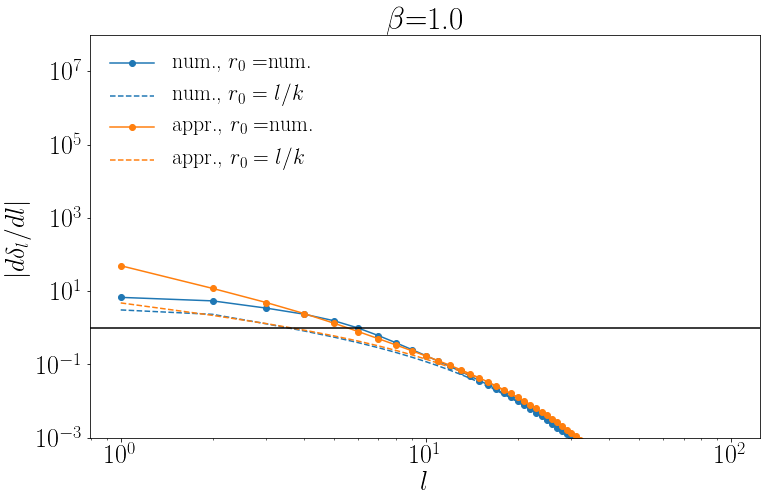

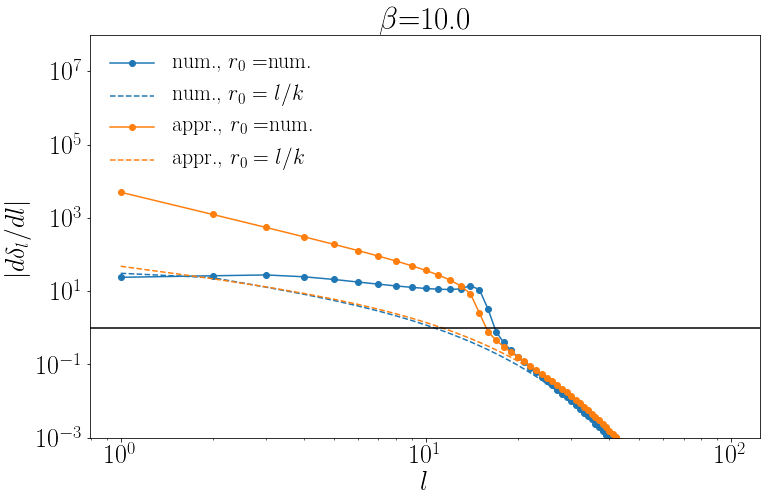

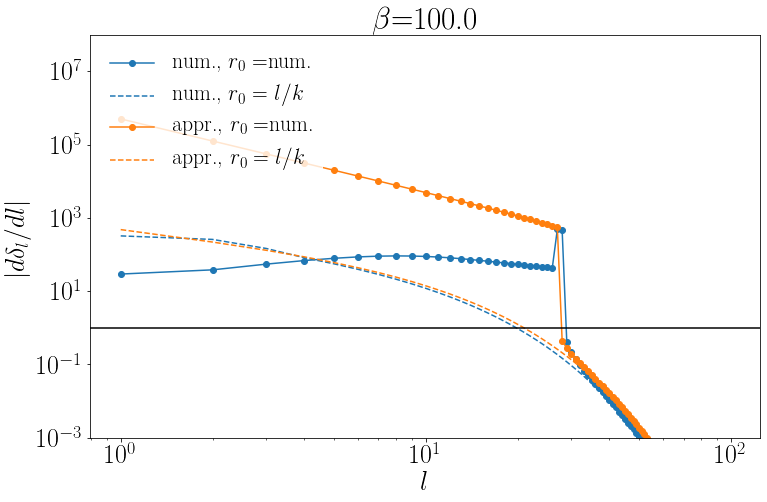

C:\Users\Laura Sagunski\Anaconda2\lib\site-packages\ipykernel_launcher.py:50: IntegrationWarning: The integral is probably divergent, or slowly convergent.


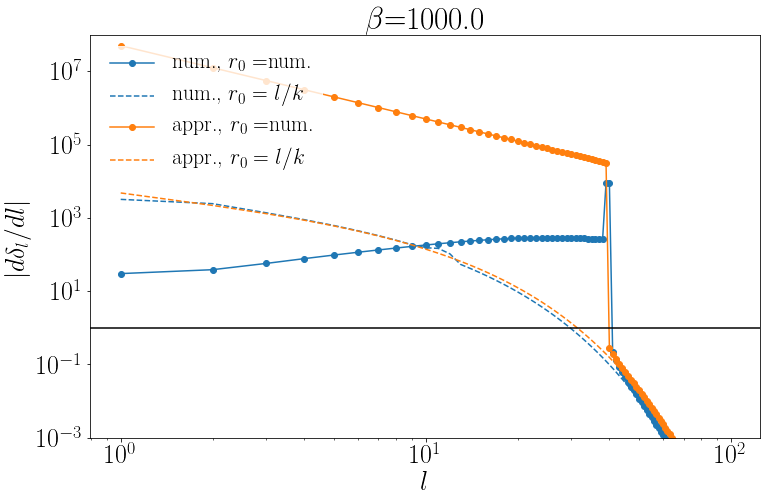

In [290]:
lvalsnew=np.array([l for l in range(1,100)]) #l=1,2,...,1500
#print(lvalsnew)

for beta in [1.,10.,100.,1000.]:
#for beta in [1000.]:
    pl.figure(figsize=(12,12/goldenratio)) #Sophia's plot size.
    
    ddeltaldlr0num_betavals=ddeltaldlr0num_beta(lvalsnew,beta)
    #print(ddeltaldlr0num_betavals)
    pl.plot(ddeltaldlr0num_betavals[:,0],abs(ddeltaldlr0num_betavals[:,1]),'o-',color='C0',label='num., $r_0=$num.')
    
    ddeltaldl_betavals=ddeltaldl_beta(lvalsnew,beta)
    #print(ddeltaldlr0num_betavals)
    pl.plot(ddeltaldl_betavals[:,0],abs(ddeltaldl_betavals[:,1]),color='C0',linestyle='--',label='num., $r_0=l / k$')
    
    pl.plot(lvalsnew,[abs(ddeltaldlapprr0num_beta(l,beta)) for l in lvalsnew],'o-',color='C1',label=r'appr., $r_0=$num.')
    
    pl.plot(lvalsnew,[abs(ddeltaldlappr_beta(l,beta)) for l in lvalsnew],color='C1',linestyle='--',label=r'appr., $r_0=l / k$')
   
    pl.axhline(1,color='black')
    
    pl.xscale('log')
    pl.yscale('log')
    pl.ylim([10.**(-3.),10.**8.])
    pl.xlabel(r'$l$',fontsize=fontsize)
    #pl.ylabel(r'$\Delta (\delta_{l+1}-\delta_{l})$',fontsize=fontsize) 
    pl.ylabel(r'$| d \delta_{l} / d l |$',fontsize=fontsize) 
    pl.legend(loc='upper left',edgecolor='white',fontsize=legendfontsize) 
    pl.title(r'$\beta$='+str(beta))
    #pl.savefig('Plots/ddeltal_dl_beta'+str(beta)+'.pdf',bbox_inches='tight')
    #print('PPlots/ddeltal_dl_beta'+str(beta)+'.pdf exported.')
    pl.show()

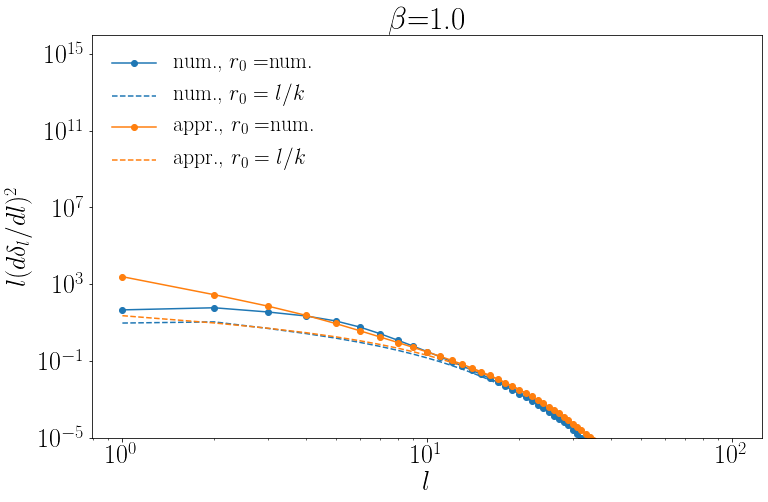

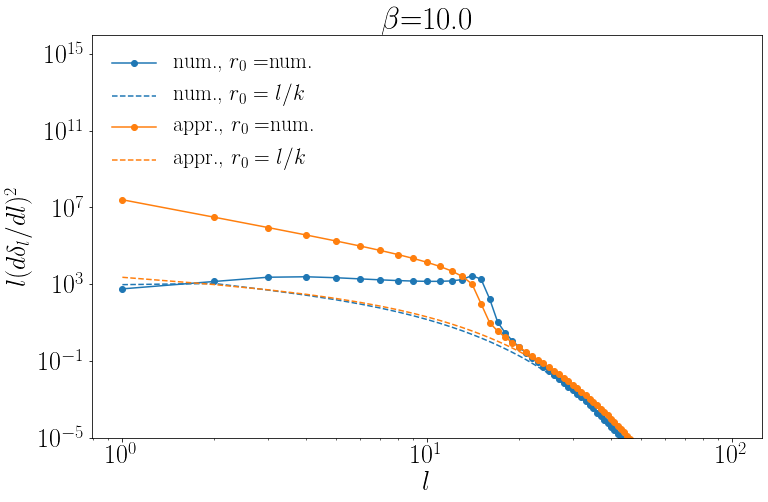

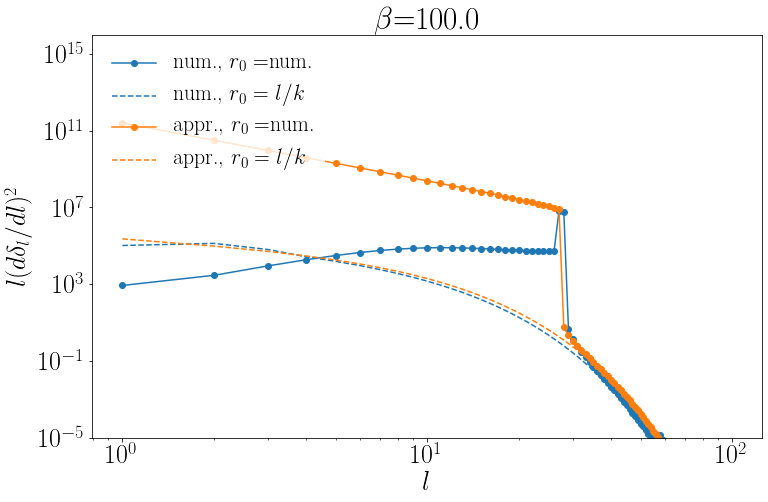

C:\Users\Laura Sagunski\Anaconda2\lib\site-packages\ipykernel_launcher.py:50: IntegrationWarning: The integral is probably divergent, or slowly convergent.


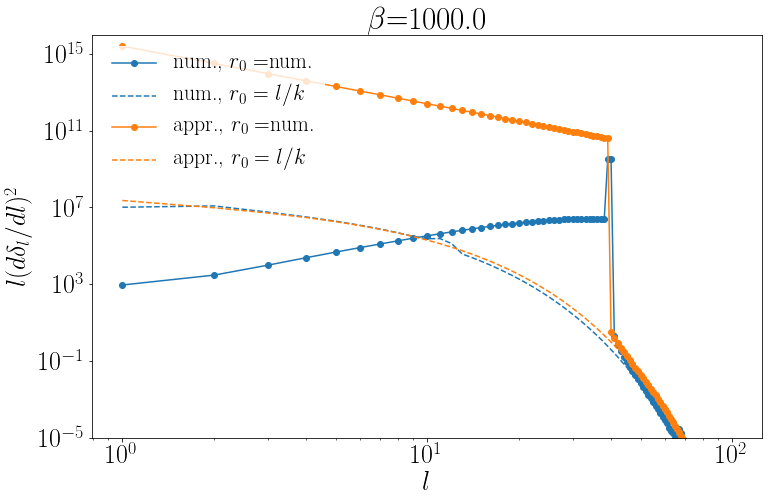

In [259]:
lvalsnew=np.array([l for l in range(1,100)]) #l=1,2,...,1500
#print(lvalsnew)

for beta in [1.,10.,100.,1000.]:
#for beta in [1000.]:
    pl.figure(figsize=(12,12/goldenratio)) #Sophia's plot size.
    
    ddeltaldlr0num_betavals=ddeltaldlr0num_beta(lvalsnew,beta)
    #print(ddeltaldlr0num_betavals)
    pl.plot(ddeltaldlr0num_betavals[:,0],ddeltaldlr0num_betavals[:,0]*ddeltaldlr0num_betavals[:,1]**2.,'o-',color='C0',label='num., $r_0=$num.')
    
    ddeltaldl_betavals=ddeltaldl_beta(lvalsnew,beta)
    #print(ddeltaldlr0num_betavals)
    pl.plot(ddeltaldl_betavals[:,0],ddeltaldl_betavals[:,0]*ddeltaldl_betavals[:,1]**2.,color='C0',linestyle='--',label='num., $r_0=l / k$')
    
    pl.plot(lvalsnew,[l*ddeltaldlapprr0num_beta(l,beta)**2. for l in lvalsnew],'o-',color='C1',label=r'appr., $r_0=$num.')
    
    pl.plot(lvalsnew,[l*ddeltaldlappr_beta(l,beta)**2. for l in lvalsnew],color='C1',linestyle='--',label=r'appr., $r_0=l / k$')
   
    pl.xscale('log')
    pl.yscale('log')
    pl.ylim([10.**(-5.),10.**16.])
    pl.xlabel(r'$l$',fontsize=fontsize)
    #pl.ylabel(r'$\Delta (\delta_{l+1}-\delta_{l})$',fontsize=fontsize) 
    pl.ylabel(r'$l (d \delta_{l} / d l)^2$',fontsize=fontsize) 
    pl.legend(loc='upper left',edgecolor='white',fontsize=legendfontsize) 
    pl.title(r'$\beta$='+str(beta))
    #pl.savefig('Plots/ddeltal_dl_beta'+str(beta)+'.pdf',bbox_inches='tight')
    #print('PPlots/ddeltal_dl_beta'+str(beta)+'.pdf exported.')
    pl.show()

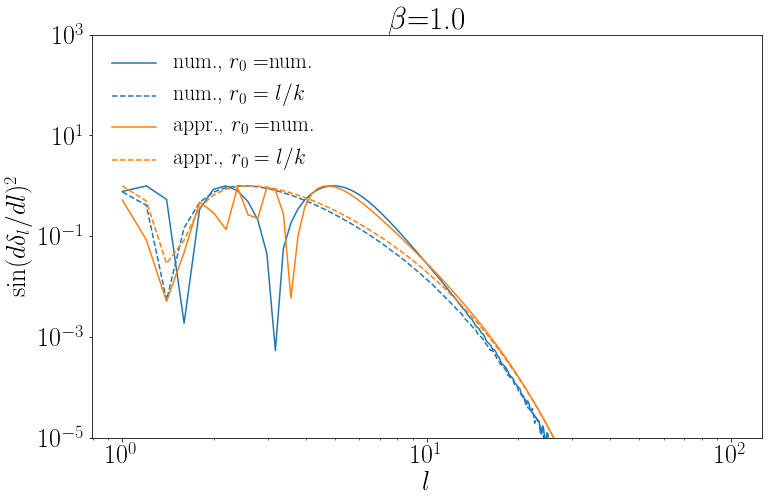

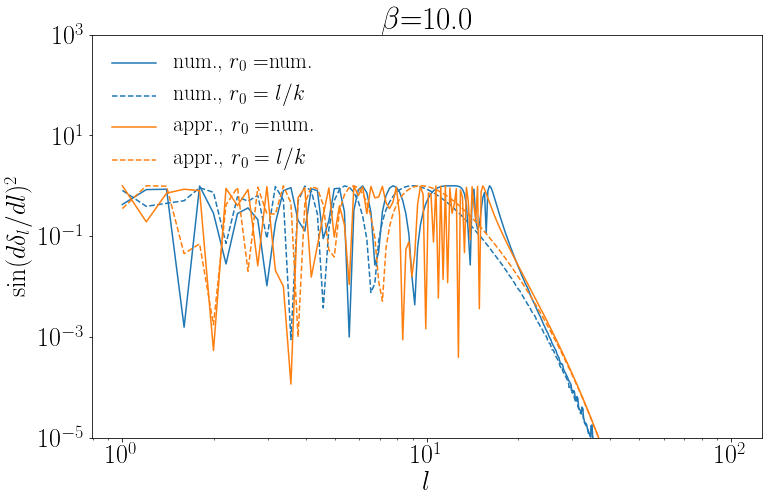

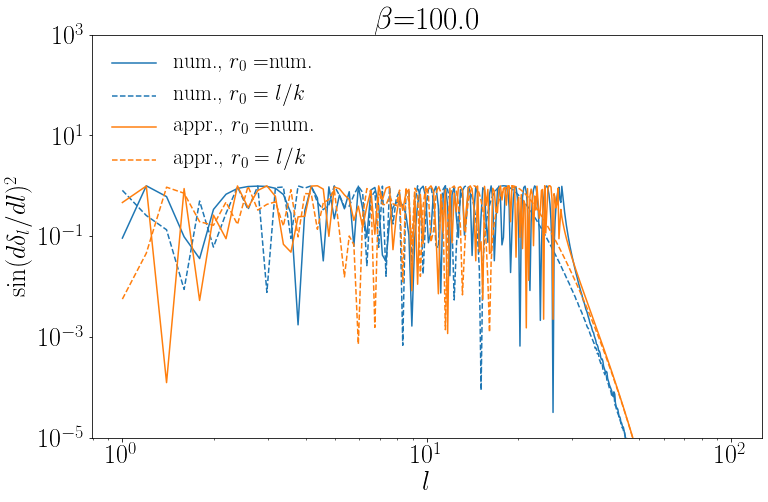

C:\Users\Laura Sagunski\Anaconda2\lib\site-packages\ipykernel_launcher.py:50: IntegrationWarning: The integral is probably divergent, or slowly convergent.


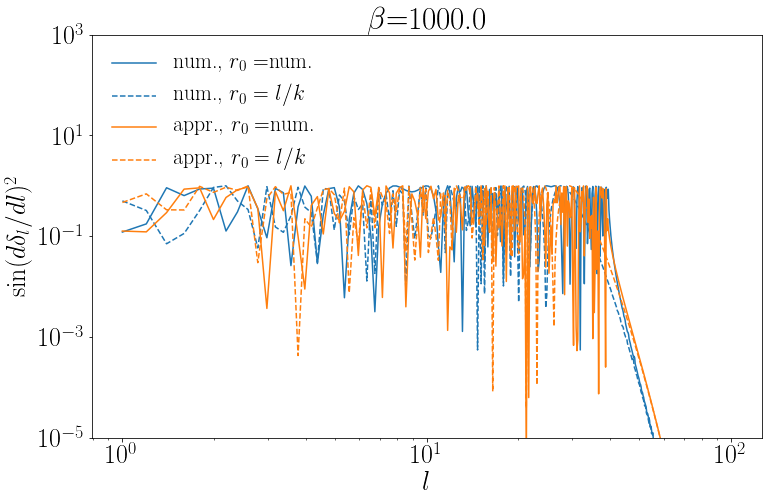

In [264]:
lvalsnew=np.array([l for l in range(1,100)]) #l=1,2,...,1500
lvalsnew=np.linspace(1,100,500) #l=1,2,...,1500
#print(lvalsnew)

for beta in [1.,10.,100.,1000.]:
#for beta in [1000.]:
    pl.figure(figsize=(12,12/goldenratio)) #Sophia's plot size.
    
    ddeltaldlr0num_betavals=ddeltaldlr0num_beta(lvalsnew,beta)
    #print(ddeltaldlr0num_betavals)
    pl.plot(ddeltaldlr0num_betavals[:,0],np.sin(ddeltaldlr0num_betavals[:,1])**2.,'-',color='C0',label='num., $r_0=$num.')
    
    ddeltaldl_betavals=ddeltaldl_beta(lvalsnew,beta)
    #print(ddeltaldlr0num_betavals)
    pl.plot(ddeltaldl_betavals[:,0],np.sin(ddeltaldl_betavals[:,1])**2.,color='C0',linestyle='--',label='num., $r_0=l / k$')
    
    pl.plot(lvalsnew,[np.sin(ddeltaldlapprr0num_beta(l,beta))**2. for l in lvalsnew],'-',color='C1',label=r'appr., $r_0=$num.')
    
    pl.plot(lvalsnew,[np.sin(ddeltaldlappr_beta(l,beta))**2. for l in lvalsnew],color='C1',linestyle='--',label=r'appr., $r_0=l / k$')
   
    pl.xscale('log')
    pl.yscale('log')
    pl.ylim([10.**(-5.),10.**3.])
    pl.xlabel(r'$l$',fontsize=fontsize)
    #pl.ylabel(r'$\Delta (\delta_{l+1}-\delta_{l})$',fontsize=fontsize) 
    pl.ylabel(r'$\sin(d \delta_{l} / d l)^2$',fontsize=fontsize) 
    pl.legend(loc='upper left',edgecolor='white',fontsize=legendfontsize) 
    pl.title(r'$\beta$='+str(beta))
    #pl.savefig('Plots/ddeltal_dl_beta'+str(beta)+'.pdf',bbox_inches='tight')
    #print('PPlots/ddeltal_dl_beta'+str(beta)+'.pdf exported.')
    pl.show()

In [265]:
def sTulintimesmPhi2(beta):
    if beta < 0.1:
        return 4*np.pi*beta**2*(np.log(1+beta**(-1)))
    elif 0.1<=beta <= 10**3:
        return 8*np.pi*beta**2/(1+1.5*beta**1.65)
    elif beta > 10**3:
        return np.pi*(1+np.log(beta)-1/(2*np.log(beta)))**2

def sigmamPhi2_Analytical(beta):
    if beta <= 1:
        return 2*np.pi*beta**4*(1/beta**2 - kn(1,beta)**2 + kn(0,beta)*kn(2,beta))
    if beta > 1:
        return np.pi*beta**2*abs(prodlog(beta**2*np.pi))**2/2*(1/beta**2 - kn(1,abs(prodlog(beta**2*np.pi))/2)**2 + kn(0,abs(prodlog(np.pi*beta**2))/2)*kn(2,abs(prodlog(np.pi*beta**2))/2))

In [ ]:
   ddeltaldlr0num_betavals=ddeltaldlr0num_beta(lvalsnew,beta)
    #print(ddeltaldlr0num_betavals)
    pl.plot(ddeltaldlr0num_betavals[:,0],np.sin(ddeltaldlr0num_betavals[:,1])**2.,'-',color='C0',label='num., $r_0=$num.')
    
    ddeltaldl_betavals=ddeltaldl_beta(lvalsnew,beta)
    #print(ddeltaldlr0num_betavals)
    pl.plot(ddeltaldl_betavals[:,0],np.sin(ddeltaldl_betavals[:,1])**2.,color='C0',linestyle='--',label='num., $r_0=l / k$')
    
    pl.plot(lvalsnew,[np.sin(ddeltaldlapprr0num_beta(l,beta))**2. for l in lvalsnew],'-',color='C1',label=r'appr., $r_0=$num.')
    
    pl.plot(lvalsnew,[np.sin(ddeltaldlappr_beta(l,beta))**2. for l in lvalsnew],color='C1',linestyle='--',label=r'appr., $r_0=l / k$')


In [285]:
def sigma_times_mphi2_Numerical_apprr0num(beta):
    #_____Fixed parameters_____
    potential='attractive'
    alphaX=0.1
    mphi=0.1 #GeV.
    #_____Parameters chosen such that 2ab=10 (classical regime 2ab>>1)_____
    mX=50.*beta
    #print(mX)
    v=(0.02/beta) #km/s
    #print(v)
    prefactor = 16*mphi**2*np.pi/(mX*v)**2
    def integrand(l):
        return l*np.sin(ddeltaldlapprr0num_beta(l,beta))**2
    integral = integrate.quad(integrand,1,1000,epsabs=0, limit=200)[0]
    #integral=np.sum([integrand(l) for l in range(1,500)])
    #print(prefactor*integral)
    return prefactor*integral

for beta in [1.,1000.]:
    print(sigma_times_mphi2_Numerical_apprr0num(beta))

8.125673425250275
198.8662397845335


C:\Users\Laura Sagunski\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  


In [285]:
def sigma_times_mphi2_Numerical_apprr0num(beta):
    #_____Fixed parameters_____
    potential='attractive'
    alphaX=0.1
    mphi=0.1 #GeV.
    #_____Parameters chosen such that 2ab=10 (classical regime 2ab>>1)_____
    mX=50.*beta
    #print(mX)
    v=(0.02/beta) #km/s
    #print(v)
    prefactor = 16*mphi**2*np.pi/(mX*v)**2
    def integrand(l):
        return l*np.sin(ddeltaldlapprr0num_beta(l,beta))**2
    integral = integrate.quad(integrand,1,1000,epsabs=0, limit=200)[0]
    #integral=np.sum([integrand(l) for l in range(1,500)])
    #print(prefactor*integral)
    return prefactor*integral

for beta in [1.,1000.]:
    print(sigma_times_mphi2_Numerical_apprr0num(beta))

8.125673425250275
198.8662397845335


C:\Users\Laura Sagunski\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  


In [286]:
betamin=10.**(-3.)
betamax=10.**(2.)
betavals=np.logspace(np.log10(betamin),np.log10(betamax),10)
#print(betavals)

In [287]:
sigmavals=np.array([sigma_times_mphi2_Numerical_apprr0num(beta) for beta in betavals])
print(sigmavals)

C:\Users\Laura Sagunski\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  


[1.61423834e-05 2.10678124e-04 2.82590829e-03 4.18714166e-02
 7.58355007e-01 4.73744202e+00 1.55629802e+01 3.43708969e+01
 6.17691952e+01 1.02290649e+02]


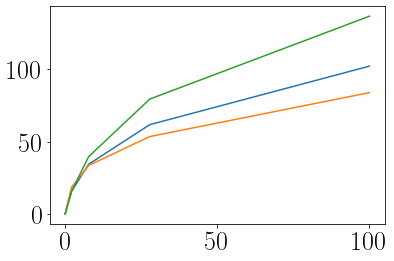

In [288]:
pl.plot(betavals,sigmavals)
pl.plot(betavals,[sTulintimesmPhi2(beta) for beta in betavals])
pl.plot(betavals,[sigmamPhi2_Analytical(beta) for beta in betavals])
pl.show()

In [ ]:







betalist = np.logspace(-2,4,100)
sigmamPhi2_2_list = np.array([sigma_times_mPhi2_Numerical_2(0.1,50*beta,0.1,0.02/beta) for beta in betalist])


betalist2 = np.logspace(-2,4,10000);
sigma_classicalList = [sTulintimesmPhi2(beta) for beta in betalist2]
sigmamPhi2_analyticalList = [sigmamPhi2_Analytical(beta) for beta in betalist2]


plt.loglog(betalist, sigmamPhi2_2_list, label=r'Numerical (Using $\delta_{l+1}-\delta_l$)')
plt.loglog(betalist2, sigma_classicalList, label='Classical')
plt.loglog(betalist2, sigmamPhi2_analyticalList, linestyle='dashed', label = 'Analytical')
#plt.ylim(0.1,500)
plt.legend()
plt.xlabel(r'$\beta$', fontsize =12)
plt.ylabel(r'$\sigma\, m_\phi^2$', fontsize=12)
plt.show()


# Transfer cross section sigmaT

## Approximate analytical solution for lmin=1

In [41]:
#def sigmaT_appr(potential,alphaX,mX,mphi,v):
def sigmaT_appr(alphaX,mX,mphi,v):
    ### No difference between attractive and repulsive case for cross section.
    #if potential=='attractive':
    #    prefactor=+1.
    #elif potential=='repulsive':
    #    prefactor=-1.
    #_____Variables_____
    a=(v/c)/(2*alphaX)
    b=alphaX*(mX/mphi)
    beta=1./(2.*a**2.*b)
    k=(c/hbar)*a*b*mphi
    #_____sigmaT_appr_____
    x=1/(a*b)
    #sigmaT_appr=((8.*np.pi)/(mphi*GeV_to_cmminus1)**2.)*a**2.*beta**4.*(1./hbar**4.)*(kn(0.,x)*kn(2.,x)-kn(1.,x)**2.)
    #print(sigmaT_appr)
    sigmaT_appr=((4.*np.pi)/(k*(GeV_to_cmminus1/c))**2.)*(1./(8*a**3.*b))*(x*kn(0.,x)**2.-x*kn(1.,x)**2.+2.*kn(0.,x)*kn(1.,x))
    #print(sigmaT_appr) ###Same result as before.
    return sigmaT_appr

def sigmaTm_appr(alphaX,mX,mphi,v):
    return sigmaT_appr(alphaX,mX,mphi,v)/(mX*GeV_to_g) #cm**2/g

potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
v=1000 #km/s
print(sigmaT_appr(alphaX,mX,mphi,v))
print(sigmaTm_appr(alphaX,mX,mphi,v))

2.1442877197733682e-24
0.006023280111722945


## Approximate analytical solution for variable lmin

In [28]:
#def sigmaT_appr(potential,alphaX,mX,mphi,v):
def sigmaT_apprnew(alphaX,mX,mphi,v,lmin,lmax):
    ### No difference between attractive and repulsive case for cross section.
    #if potential=='attractive':
    #    prefactor=+1.
    #elif potential=='repulsive':
    #    prefactor=-1.
    #_____Variables_____
    a=(v/c)/(2*alphaX)
    b=alphaX*(mX/mphi)
    beta=1./(2.*a**2.*b)
    k=(c/hbar)*a*b*mphi
    #_____sigmaT_appr_____
    xmin=lmin/(a*b)
    xmax=lmax/(a*b)
    def term(x):
        return x*kn(0.,x)**2.-x*kn(1.,x)**2.+2.*kn(0.,x)*kn(1.,x)
    #sigmaT_appr=((8.*np.pi)/(mphi*GeV_to_cmminus1)**2.)*a**2.*beta**4.*(1./hbar**4.)*(kn(0.,x)*kn(2.,x)-kn(1.,x)**2.)
    #print(sigmaT_appr)
    def term(x):
        return (x/2.)*(x*kn(0.,x)**2.-x*kn(1.,x)**2.+2.*kn(0.,x)*kn(1.,x))
    #sigmaT_appr=((4.*np.pi)/(k*GeV_to_cmminus1)**2.)*(1./(4.*a**2.))*(1./hbar**4.)*(x/2.)*(x*kn(0.,x)**2.-x*kn(1.,x)**2.+2.*kn(0.,x)*kn(1.,x))
    sigmaT_appr=((4.*np.pi)/(k*(GeV_to_cmminus1/c))**2.)*(1./(4.*a**2.))*(term(xmin)-term(xmax))
    #sigmaT_appr=((4.*np.pi)/(k*GeV_to_cmminus1)**2.)*(1./(8*a**3.*b))*(1./hbar**4.)*(term(xmin)-term(xmax))
    #print(sigmaT_appr) ###Same result as before.
    return sigmaT_appr

def sigmaTm_apprnew(alphaX,mX,mphi,v,lmin,lmax):
    return sigmaT_apprnew(alphaX,mX,mphi,v,lmin,lmax)/(mX*GeV_to_g) #cm**2/g

potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
v=1000 #km/s
a=(v/c)/(2*alphaX)
lmin=1./(2.*a)
lmax=1500
print(sigmaT_apprnew(alphaX,mX,mphi,v,lmin,lmax))
print(sigmaTm_apprnew(alphaX,mX,mphi,v,lmin,lmax))

1.7104235713474535e-24
0.004804560593672623


## Numerical solution for sigmaT

In [29]:
def sigmaT(potential,alphaX,mX,mphi,lmin,lmax,v):
    if potential=='repulsive':
        return 'sigmaT cannot be computed. No data for deltal available.'
    elif potential=='attractive':
        #_____Variables_____
        a=(v/c)/(2*alphaX)
        b=alphaX*(mX/mphi)
        beta=1./(2.*a**2.*b)
        #m=(mX/2.)  #reduced mass m
        #k=m*(v/c) #momentum k
        #print([k,a*b*mphi])
        k=(c/hbar)*a*b*mphi
        #_____Sum_____
        if lmax==len(lvals):
            lmax=lmax-1
        Sum=np.sum([(l+1.)*np.sin(deltaldata[l+1]-deltaldata[l])**2. for l in range(lmin,lmax)])
        #_____sigmaT_____
        prefactor=((4.*np.pi)/(k*(GeV_to_cmminus1/c))**2.)
        sigmaT=prefactor*Sum
        return sigmaT
    
def sigmaTm(potential,alphaX,mX,mphi,lmin,lmax,v):
    return sigmaT(potential,alphaX,mX,mphi,lmin,lmax,v)/(mX*GeV_to_g) #cm**2/g
    
potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
v=1000 #km/s
lmin=0
lmax=len(lvals)
print(sigmaT(potential,alphaX,mX,mphi,lmin,lmax,v))
print(sigmaTm(potential,alphaX,mX,mphi,lmin,lmax,v))

1.733662460019863e-24
0.004869838370842313


In [30]:
# def sigmaTBuckleyFox(potential,alphaX,mX,mphi,lmin,lmax,v):
#     if potential=='repulsive':
#         return 'sigmaT cannot be computed. No data for deltal available.'
#     elif potential=='attractive':
#         #_____Variables_____
#         a=(v/c)/(2*alphaX)
#         b=alphaX*(mX/mphi)
#         beta=1./(2.*a**2.*b)
#         #m=(mX/2.)  #reduced mass m
#         #k=m*(v/c) #momentum k
#         #print([k,a*b*mphi])
#         k=a*b*mphi
#         #_____Sum_____
#         if lmax==len(lvals):
#             lmax=lmax-1
#         Sum=np.sum([(2.*l+1.)*np.sin(deltaldata[l])**2.-(2.*l+1.)*np.sin(deltaldata[l])*np.sin(deltaldata[l+1])*np.cos(deltaldata[l+1]-deltaldata[l]) for l in range(lmin,lmax)])
#         #_____sigmaT_____
#         prefactor=((4.*np.pi)/(k*GeV_to_cmminus1)**2.)
#         sigmaT=prefactor*Sum
#         return sigmaT
    
# def sigmaTmBuckleyFox(potential,alphaX,mX,mphi,lmin,lmax,v):
#     return sigmaTBuckleyFox(potential,alphaX,mX,mphi,lmin,lmax,v)/(mX*GeV_to_g) #cm**2/g
    
# potential='attractive' #['attractive','repulsive']:
# alphaX=10.**(-2.)
# mX=200 #GeV
# mphi=10**(-3.) #GeV.
# v=1000 #km/s
# lmin=0
# lmax=len(lvals)
# #print(sigmaT(potential,alphaX,mX,mphi,lmin,lmax,v))
# print(sigmaTBuckleyFox(potential,alphaX,mX,mphi,lmin,lmax,v))
# #print(sigmaTm(potential,alphaX,mX,mphi,lmin,lmax,v))
# print(sigmaTmBuckleyFox(potential,alphaX,mX,mphi,lmin,lmax,v))

## Phenomenological fit formula for sigmaT in terms of beta

In [31]:
#_____Classical regime ((v/c)(mX/mphi)>>1 <=> 2ab>>1)_____
#For sigmaTclass see eqns.(7)+(A3) in Sean's paper "Beyond Colisionless DM...", 1302.3898

def sigmaTbeta(potential,alphaX,mX,mphi,v):
    #_____Variables_____
    a=(v/c)/(2*alphaX)
    b=alphaX*(mX/mphi)
    beta=1./(2.*a**2.*b)
    #m=(mX/2.)  #reduced mass m
    #k=m*(v/c) #momentum k
    #print([k,a*b*mphi])
    #k=(c/hbar)*a*b*mphi
    #_____sigmaT_____
    if potential=='repulsive':
        if beta<=1.:
            term=(1./2.)*beta**2.*np.log(1.+(1./beta**2.))
        elif beta>1.:
            term=(1./4.)*(np.log(2.*beta)-np.log(np.log(2.*beta)))**2.
    elif potential=='attractive':
        if beta<=10.**(-1.): 
            term=beta**2.*np.log(1.+(1./beta))
        elif 10.**(-1.)<beta<10.**3.:
            term=2.*(beta**2./(1.+1.5*beta**1.65))
        elif beta>=10.**3.:
            term=(1./4.)*(np.log(beta)+1.-1./(2.*np.log(beta)))**2.
    prefactor=((4.*np.pi)/(mphi*(GeV_to_cmminus1/c))**2.)*(hbar/c)**2
    sigmaTbeta=prefactor*term
    return sigmaTbeta

def sigmaTmbeta(potential,alphaX,mX,mphi,v):
    return sigmaTbeta(potential,alphaX,mX,mphi,v)/(mX*GeV_to_g) #cm**2/g

potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
v=1000 #km/s
print(sigmaTbeta(potential,alphaX,mX,mphi,v))
print(sigmaTmbeta(potential,alphaX,mX,mphi,v))

1.8656955980797214e-24
0.005240717972134049


In [33]:
# #Parameters from Fig.2 in Sean's paper 1302.3898. mX=200 GeV, mphi=1 MeV=10**(-3) GeV, alphaX=10**(-2), v=1000 km/s.
# potential='attractive' #['attractive','repulsive']:
# alphaX=10.**(-2.)
# mX=200 #GeV
# mphi=10**(-3.) #GeV.
# v=1000. #km/s
# #lmin=0
# lmin=1
# sigmaTmvals=np.array([[l,sigmaTm(potential,alphaX,mX,mphi,lmin,l,v)] for l in range(lmin,len(lvals))])
# print(len(sigmaTmvals))
# #sigmaTmBuckleyFoxvals=np.array([sigmaTmBuckleyFox(potential,alphaX,mX,mphi,lmin,l,v) for l in range(0,len(lvals))])
# #print(sigmaTmBuckleyFoxvals)
# print(sigmaTm_appr(alphaX,mX,mphi,v))

In [34]:
potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
v=1000. #km/s
print(ddeltal_dl_appr(potential,alphaX,mX,mphi,l,v)**2.-1.)
def root(l):
    return ddeltal_dl_appr(potential,alphaX,mX,mphi,l,v)**2.-1.
print(opt.brentq(root,1.,1500.))

-0.9999999958970616
2.9972797267555267


In [35]:
#Parameters from Fig.2 in Sean's paper 1302.3898. mX=200 GeV, mphi=1 MeV=10**(-3) GeV, alphaX=10**(-2), v=1000 km/s.
potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
v=1000. #km/s
#lmin=1
a=(v/c)/(2*alphaX)
b=alphaX*(mX/mphi)
lmin=1./(2*a)
#lmin=2.9972797267555267
print(lmin)
sigmaTmapprnewvals_1=np.array([[lmax,sigmaTm_apprnew(alphaX,mX,mphi,v,lmin,lmax)] for lmax in range(int(lmin),len(lvals))])
print(sigmaTmapprnewvals_1)

2.99792458
[[ 2.00000000e+00 -4.49209278e-04]
 [ 3.00000000e+00  7.67922569e-07]
 [ 4.00000000e+00  3.19948704e-04]
 ...
 [ 1.49800000e+03  4.80455907e-03]
 [ 1.49900000e+03  4.80455984e-03]
 [ 1.50000000e+03  4.80456059e-03]]


In [36]:
#Parameters from Fig.2 in Sean's paper 1302.3898. mX=200 GeV, mphi=1 MeV=10**(-3) GeV, alphaX=10**(-2), v=1000 km/s.
potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
v=1000. #km/s
#lmin=1
a=(v/c)/(2*alphaX)
b=alphaX*(mX/mphi)
lmin=1./(a)
#lmin=2.9972797267555267
print(lmin)
sigmaTmapprnewvals_2=np.array([[lmax,sigmaTm_apprnew(alphaX,mX,mphi,v,lmin,lmax)] for lmax in range(int(lmin),len(lvals))])
print(sigmaTmapprnewvals_2)

5.99584916
[[ 5.00000000e+00 -2.01372573e-04]
 [ 6.00000000e+00  7.67102586e-07]
 [ 7.00000000e+00  1.71597515e-04]
 ...
 [ 1.49800000e+03  4.03574278e-03]
 [ 1.49900000e+03  4.03574354e-03]
 [ 1.50000000e+03  4.03574430e-03]]


In [37]:
#Parameters from Fig.2 in Sean's paper 1302.3898. mX=200 GeV, mphi=1 MeV=10**(-3) GeV, alphaX=10**(-2), v=1000 km/s.
potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
v=1000. #km/s
#lmin=1
a=(v/c)/(2*alphaX)
b=alphaX*(mX/mphi)
lmin=1./(a*b)
#lmin=2.9972797267555267
print(lmin)
sigmaTmapprnewvals_3=np.array([[lmax,sigmaTm_apprnew(alphaX,mX,mphi,v,lmin,lmax)] for lmax in range(int(lmin),len(lvals))])
print(sigmaTmapprnewvals_3)

0.0029979245799999998
[[0.00000000e+00            nan]
 [1.00000000e+00 6.44957267e-03]
 [2.00000000e+00 7.21895858e-03]
 ...
 [1.49800000e+03 1.24727269e-02]
 [1.49900000e+03 1.24727277e-02]
 [1.50000000e+03 1.24727285e-02]]


C:\Users\Laura Sagunski\Anaconda2\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


In [38]:
#Parameters from Fig.2 in Sean's paper 1302.3898. mX=200 GeV, mphi=1 MeV=10**(-3) GeV, alphaX=10**(-2), v=1000 km/s.
potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
v=1000. #km/s
#lmin=1
a=(v/c)/(2*alphaX)
b=alphaX*(mX/mphi)
lmin=1./(2*a*b)
#lmin=2.9972797267555267
print(lmin)
sigmaTmapprnewvals_4=np.array([[lmax,sigmaTm_apprnew(alphaX,mX,mphi,v,lmin,lmax)] for lmax in range(int(lmin),len(lvals))])
print(sigmaTmapprnewvals_4)

0.0014989622899999999
[[0.00000000e+00            nan]
 [1.00000000e+00 7.21904839e-03]
 [2.00000000e+00 7.98843431e-03]
 ...
 [1.49800000e+03 1.32422027e-02]
 [1.49900000e+03 1.32422034e-02]
 [1.50000000e+03 1.32422042e-02]]


C:\Users\Laura Sagunski\Anaconda2\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


[0.006023280111722945, 0.005240717972134049]
Plots/sigmaT_analytical_vs_numerical.pdf exported.


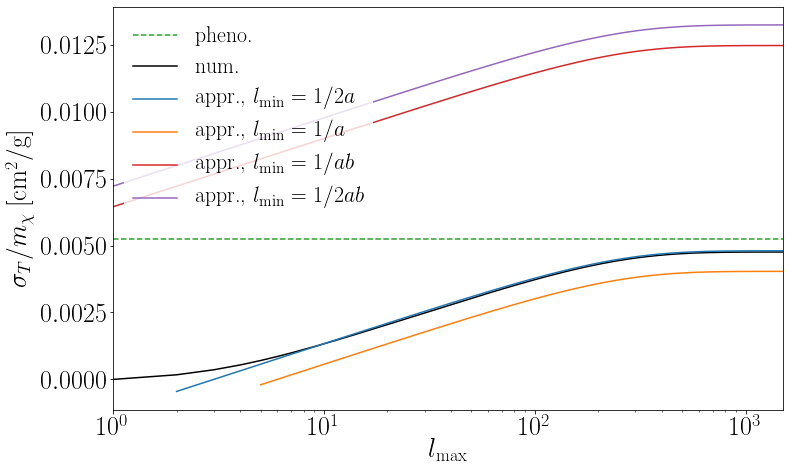

In [42]:
pl.figure(figsize=(12,12/goldenratio)) #Sophia's plot size.
print([sigmaTm_appr(alphaX,mX,mphi,v),sigmaTmbeta(potential,alphaX,mX,mphi,v)])
#pl.axhline(sigmaTm_appr(alphaX,mX,mphi,v),linestyle='-',label='appr.',color='C0')
pl.axhline(sigmaTmbeta(potential,alphaX,mX,mphi,v),linestyle='--',label='pheno.',color='C2')
pl.plot(sigmaTmvals[:,0],sigmaTmvals[:,1],'-',label='num.',color='black')
pl.plot(sigmaTmapprnewvals_1[:,0],sigmaTmapprnewvals_1[:,1],'-',label=r'appr., $l_{\rm min}=1/2a$',color='C0')
pl.plot(sigmaTmapprnewvals_2[:,0],sigmaTmapprnewvals_2[:,1],'-',label=r'appr., $l_{\rm min}=1/a$',color='C1')
pl.plot(sigmaTmapprnewvals_3[:,0],sigmaTmapprnewvals_3[:,1],'-',label=r'appr., $l_{\rm min}=1/ab$',color='C3')
pl.plot(sigmaTmapprnewvals_4[:,0],sigmaTmapprnewvals_4[:,1],'-',label=r'appr., $l_{\rm min}=1/2ab$',color='C4')
#pl.plot(lvals,sigmaTmBuckleyFoxvals,'o-') 

pl.xscale('log')
pl.xlim([1,1500])
#pl.ylim([-0.035,0.015])
#pl.ylim([0.,0.0065])
pl.xlabel(r'$l_{\rm max}$',fontsize=fontsize) 
pl.ylabel(r'$\sigma_{T}/m_{\chi} \;[\rm cm^2/g]$',fontsize=fontsize) 
pl.legend(loc='upper left',edgecolor='white',fontsize=legendfontsize) 
pl.savefig('Plots/sigmaT_analytical_vs_numerical.pdf',bbox_inches='tight')
print('Plots/sigmaT_analytical_vs_numerical.pdf exported.')
pl.show()

[0.006023280111722945, 0.005240717972134049]
Plots/sigmaT_analytical_vs_numerical.pdf exported.


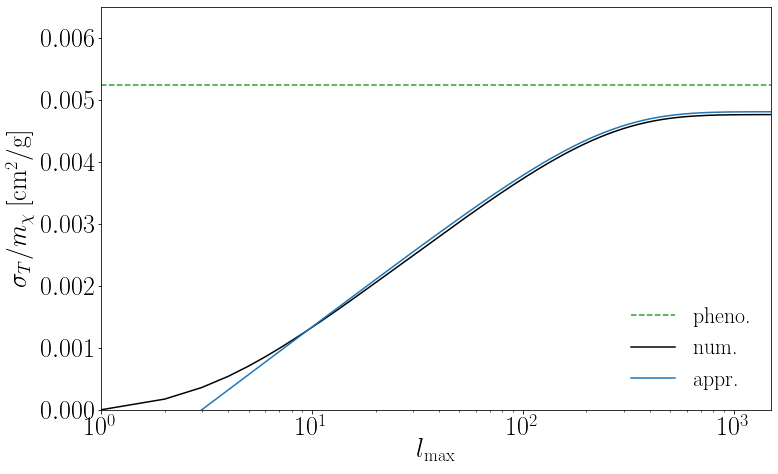

In [43]:
pl.figure(figsize=(12,12/goldenratio)) #Sophia's plot size.
print([sigmaTm_appr(alphaX,mX,mphi,v),sigmaTmbeta(potential,alphaX,mX,mphi,v)])
#pl.axhline(sigmaTm_appr(alphaX,mX,mphi,v),linestyle='-',label='appr.',color='C0')
pl.axhline(sigmaTmbeta(potential,alphaX,mX,mphi,v),linestyle='--',label='pheno.',color='C2')
pl.plot(sigmaTmvals[:,0],sigmaTmvals[:,1],'-',label='num.',color='black')
pl.plot(sigmaTmapprnewvals_1[:,0],sigmaTmapprnewvals_1[:,1],'-',label='appr.',color='C0')
#pl.plot(lvals,sigmaTmBuckleyFoxvals,'o-') 

pl.xscale('log')
pl.xlim([1,1500])
#pl.ylim([-0.035,0.015])
pl.ylim([0.,0.0065])
pl.xlabel(r'$l_{\rm max}$',fontsize=fontsize) 
pl.ylabel(r'$\sigma_{T}/m_{\chi} \;[\rm cm^2/g]$',fontsize=fontsize) 
pl.legend(loc='lower right',edgecolor='white',fontsize=legendfontsize) 
pl.savefig('Plots/sigmaT_analytical_vs_numerical.pdf',bbox_inches='tight')
print('Plots/sigmaT_analytical_vs_numerical.pdf exported.')
pl.show()

C:\Users\Laura Sagunski\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  # This is added back by InteractiveShellApp.init_path()


Plots/Difference_sigmaT_analytical_vs_numerical.pdf exported.


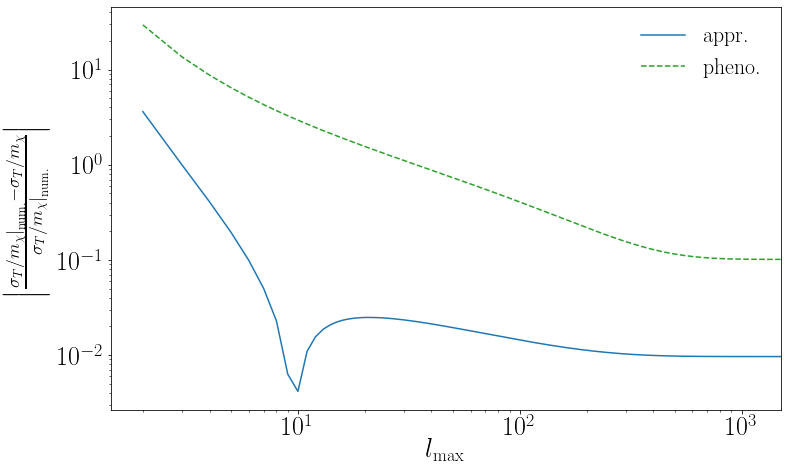

In [139]:
pl.figure(figsize=(12,12/goldenratio)) #Sophia's plot size.
#print([sigmaTm_appr(alphaX,mX,mphi,v),sigmaTmbeta(potential,alphaX,mX,mphi,v)])
#pl.axhline(sigmaTm_appr(alphaX,mX,mphi,v),label='appr.',color='C0')
#pl.axhline(sigmaTmbeta(potential,alphaX,mX,mphi,v),label='pheno.',color='C3')
pl.plot(sigmaTmvals[1::][:,0],abs((sigmaTmvals[1::][:,1]-sigmaTmapprnewvals_1[:,1])/sigmaTmvals[1::][:,1]),'-',label='appr.',color='C0')
pl.plot(sigmaTmvals[1::][:,0],abs((sigmaTmvals[1::][:,1]-sigmaTmbeta(potential,alphaX,mX,mphi,v))/sigmaTmvals[1::][:,1]),'--',label='pheno.',color='C2')
#pl.plot(lvals,sigmaTmBuckleyFoxvals,'o-') 

pl.xscale('log')
pl.yscale('log')
pl.xlim([0,1500])
#pl.ylim([-0.035,0.015])
#pl.ylim([0.,0.0065])
pl.xlabel(r'$l_{\rm max}$',fontsize=fontsize) 
pl.ylabel(r'$\sigma_{T}/m_{\chi} \;[\rm cm^2/g]$',fontsize=fontsize) 
pl.ylabel(r'$\left|\frac{\left.\sigma_{T}/m_{\chi}\right|_{\rm num.}-\sigma_{T}/m_{\chi}}{\left.\sigma_{T}/m_{\chi}\right|_{\rm num.}}\right|$',fontsize=fontsize) 

pl.legend(loc='upper right',edgecolor='white',fontsize=legendfontsize) 
pl.savefig('Plots/Difference_sigmaT_analytical_vs_numerical.pdf',bbox_inches='tight')
print('Plots/Difference_sigmaT_analytical_vs_numerical.pdf exported.')
pl.show()

# Comparison of analytical approximation for sigmaT with phenomenological fit formula in terms of beta

## Approximate analytical solution for lmin=1/(2a)

In [46]:
def sigmaT_apprnewbeta(alphaX,mX,mphi,v):
    ### No difference between attractive and repulsive case for cross section.
    #if potential=='attractive':
    #    prefactor=+1.
    #elif potential=='repulsive':
    #    prefactor=-1.
    #_____Variables_____
    a=(v/c)/(2*alphaX)
    b=alphaX*(mX/mphi)
    beta=1./(2.*a**2.*b)
    #k=(c/hbar)*a*b*mphi
    #_____sigmaT_appr_____
    prefactor=((2.*np.pi)/(mphi*(GeV_to_cmminus1/c))**2.)*(hbar/c)**2
    term=beta**4.*(kn(0.,beta)*kn(2.,beta)-kn(1.,beta)**2.)
    sigmaT=prefactor*term
    return sigmaT

def sigmaTm_apprnewbeta(alphaX,mX,mphi,v):
    return sigmaT_apprnewbeta(alphaX,mX,mphi,v)/(mX*GeV_to_g) #cm**2/g

potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
v=1000 #km/s
print(sigmaT_apprnewbeta(alphaX,mX,mphi,v))
print(sigmaTm_apprnewbeta(alphaX,mX,mphi,v))
###Ok. Agrees with what we had before.

1.7104678314171127e-24
0.004804684919710991


In [47]:
def sigmaT_apprbeta(mphi,beta):
    ### No difference between attractive and repulsive case for cross section.
    #if potential=='attractive':
    #    prefactor=+1.
    #elif potential=='repulsive':
    #    prefactor=-1.
    #_____sigmaT_appr_____
    prefactor=((2.*np.pi)/(mphi*(GeV_to_cmminus1/c))**2.)*(hbar/c)**2
    term=beta**4.*(kn(0.,beta)*kn(2.,beta)-kn(1.,beta)**2.)
    sigmaT=prefactor*term
    return sigmaT

def sigmaTm_apprbeta(mX,mphi,beta):
    return sigmaT_apprbeta(mphi,beta)/(mX*GeV_to_g) #cm**2/g

potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
v=1000 #km/s
a=(v/c)/(2*alphaX)
b=alphaX*(mX/mphi)
beta=1./(2.*a**2.*b)
print(sigmaT_apprbeta(mphi,beta))
print(sigmaTm_apprbeta(mX,mphi,beta))
###Ok.

1.7104678314171127e-24
0.004804684919710991


## Approximate analytical solution including higher order terms for lmin

In [101]:
def sigmaT_apprbeta_higherorder(mphi,beta):
    ### No difference between attractive and repulsive case for cross section.
    #if potential=='attractive':
    #    prefactor=+1.
    #elif potential=='repulsive':
    #    prefactor=-1.
    #_____f(beta)=lmin/(ab)_____
    C=1.-2*gammaE+2.*np.log(2.)
    #fbeta=((2.*abs(np.sqrt(1.-C*beta**2.+0J)-1.))/C)*(1./beta) #0J to allow for imaginary solutions from np.sqrt(). abs()=|a|=a*a takes absolute value of both real and imaginary numbers properly.
    fbeta=((2.*(np.sqrt(1.+C*beta**2.)-1.))/C)*(1./beta)
    #_____sigmaT_appr_____
    prefactor=((2.*np.pi)/(mphi*(GeV_to_cmminus1/c))**2.)*(hbar/c)**2
    term=beta**2.*fbeta**2.*(kn(0.,fbeta)*kn(2.,fbeta)-kn(1.,fbeta)**2.)
    sigmaT=prefactor*term
    return sigmaT

def sigmaTm_apprbeta_higherorder(mX,mphi,beta):
    return sigmaT_apprbeta_higherorder(mphi,beta)/(mX*GeV_to_g) #cm**2/g

potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
v=1000 #km/s
a=(v/c)/(2*alphaX)
b=alphaX*(mX/mphi)
beta=1./(2.*a**2.*b)
print(sigmaT_apprbeta(mphi,beta))
print(sigmaT_apprbeta_higherorder(mphi,beta))
print(sigmaTm_apprbeta(mX,mphi,beta))
print(sigmaTm_apprbeta_higherorder(mX,mphi,beta))
###Ok.

1.7104678314171127e-24
1.710477657978813e-24
0.004804684919710991
0.004804712522412396


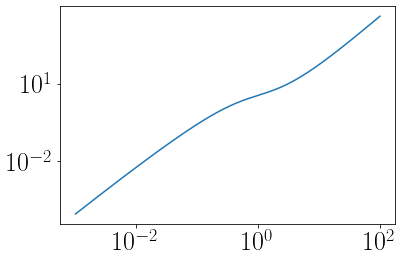

In [102]:
pl.xscale('log')
pl.yscale('log')
pl.plot(betavals,sigmaTm_apprbeta_higherorder(mX,mphi,betavals))
pl.show()

# Function C(beta)=(sigmaT c/hbar)^2 mphi^2) /pi

## Approximate analytical solution for lmin=1/(2a)

In [103]:
def Cappr(beta):
    #_____C(beta)=(sigmaT_apprbeta*(c/hbar)**2.*mphi**2)/np.pi_____
    C=2.*beta**4.*(kn(0.,beta)*kn(2.,beta)-kn(1.,beta)**2.)
    return C

#Parameters from Fig.2 in Sean's paper 1302.3898. mX=200 GeV, mphi=1 MeV=10**(-3) GeV, alphaX=10**(-2), v=1000 km/s.
potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
v=1000. #km/s
a=(v/c)/(2*alphaX)
b=alphaX*(mX/mphi)
beta=1./(2.*a**2.*b)
print('beta='+str(beta))
print(Cappr(beta))

##Numerical solution for C from Sean's data for deltal
lmin=0
lmax=len(lvals)
Cnum=(sigmaT(potential,alphaX,mX,mphi,lmin,lmax,v)*(c/hbar)**2.*(mphi*(GeV_to_cmminus1/c))**2.)/np.pi
print(Cnum)

beta=0.008987551787368176
0.0013984220094175315
0.001417385171742238


## Approximate analytical solution including higher order terms for lmin

In [106]:
def Cappr_higherorder(beta):
    #_____f(beta)=lmin/(ab)_____
    C=1.-2*gammaE+2.*np.log(2.)
    #fbeta=((2.*abs(np.sqrt(1.-C*beta**2.+0J)-1.))/C)*(1./beta) #0J to allow for imaginary solutions from np.sqrt(). abs()=|a|=a*a takes absolute value of both real and imaginary numbers properly.
    fbeta=((2.*(np.sqrt(1.+C*beta**2.)-1.))/C)*(1./beta)
    #_____C(beta)=(sigmaT_apprbeta_higherorder*(c/hbar)**2.*mphi**2)/np.pi_____
    C=2.*beta**2.*fbeta**2.*(kn(0.,fbeta)*kn(2.,fbeta)-kn(1.,fbeta)**2.)
    return C

#Parameters from Fig.2 in Sean's paper 1302.3898. mX=200 GeV, mphi=1 MeV=10**(-3) GeV, alphaX=10**(-2), v=1000 km/s.
potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
v=1000. #km/s
a=(v/c)/(2*alphaX)
b=alphaX*(mX/mphi)
beta=1./(2.*a**2.*b)
print('beta='+str(beta))
print(Cappr(beta))
print(Cappr_higherorder(beta))

##Numerical solution for C from Sean's data for deltal
lmin=0
lmax=len(lvals)
Cnum=(sigmaT(potential,alphaX,mX,mphi,lmin,lmax,v)*(c/hbar)**2.*(mphi*(GeV_to_cmminus1/c))**2.)/np.pi
print(Cnum)

beta=0.008987551787368176
0.0013984220094175315
0.0013984300432898478
0.001417385171742238


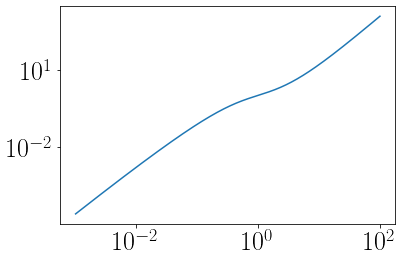

In [107]:
pl.xscale('log')
pl.yscale('log')
pl.plot(betavals,Cappr_higherorder(betavals))
pl.show()

## Phenomenological fit formula 

In [108]:
###C(beta)=sigmaT_apprbeta/(np.pi*(c/hbar)**2.*mphi**2)
def Cpheno(beta):
    #_____C(beta)=(sigmaT_apprbeta*(c/hbar)**2.*mphi**2)/np.pi_____
    if potential=='repulsive':
        if beta<=1.:
            C=2.*beta**2.*np.log(1.+(1./beta**2.))
        elif beta>1.:
            C=(np.log(2.*beta)-np.log(np.log(2.*beta)))**2.
    elif potential=='attractive':
        if beta<=10.**(-1.): 
            C=4.*beta**2.*np.log(1.+(1./beta))
        elif 10.**(-1.)<beta<10.**3.:
            C=8.*(beta**2./(1.+1.5*beta**1.65))
        elif beta>=10.**3.:
            C=(np.log(beta)+1.-1./(2.*np.log(beta)))**2.
    return C

potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
v=1000 #km/s
a=(v/c)/(2*alphaX)
b=alphaX*(mX/mphi)
beta=1./(2.*a**2.*b)
print('beta='+str(beta))
print(Cpheno(beta))

beta=0.008987551787368176
0.0015253311049214656


In [86]:
betamin=10.**(-3.)
betamax=10.**(2.)
betavals=np.logspace(np.log10(betamin),np.log10(betamax),500)
#print(betavals)

In [87]:
#Parameters from Fig.2 in Sean's paper 1302.3898. mX=200 GeV, mphi=1 MeV=10**(-3) GeV, alphaX=10**(-2), v=1000 km/s.
potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
v=1000. #km/s
a=(v/c)/(2*alphaX)
b=alphaX*(mX/mphi)
beta=1./(2.*a**2.*b)
##Numerical solution for C from Sean's data for deltal
lmin=0
lmax=len(lvals)
Cnum=(sigmaT(potential,alphaX,mX,mphi,lmin,lmax,v)*(c/hbar)**2.*(mphi*(GeV_to_cmminus1/c))**2.)/np.pi
print(Cnum)

0.001417385171742238


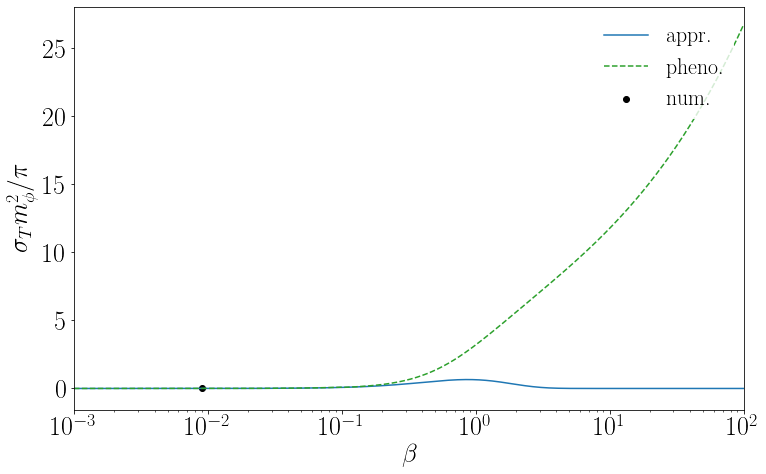

In [52]:
pl.figure(figsize=(12,12/goldenratio)) #Sophia's plot size.
pl.plot(betavals,Cappr(betavals),'-',label='appr.',color='C0')
pl.plot(betavals,np.array([Cpheno(beta) for beta in betavals]),linestyle='--',label='pheno.',color='C2')
pl.scatter(beta,Cnum,label='num.',color='black')

pl.xscale('log')
#pl.yscale('log')
pl.xlim([betamin,betamax])
#pl.ylim([1,10.**(-10.)])
pl.xlabel(r'$\beta$',fontsize=fontsize) 
pl.ylabel(r'$\sigma_{T} m_{\phi}^2 / \pi$',fontsize=fontsize) 
pl.legend(loc='upper right',edgecolor='white',fontsize=legendfontsize) 
#pl.savefig('Plots/C_analytical_vs_pheno.pdf',bbox_inches='tight')
#print('Plots/C_analytical_vs_pheno.pdf exported.')
pl.show()

Plots/C_analytical_vs_pheno.pdf exported.


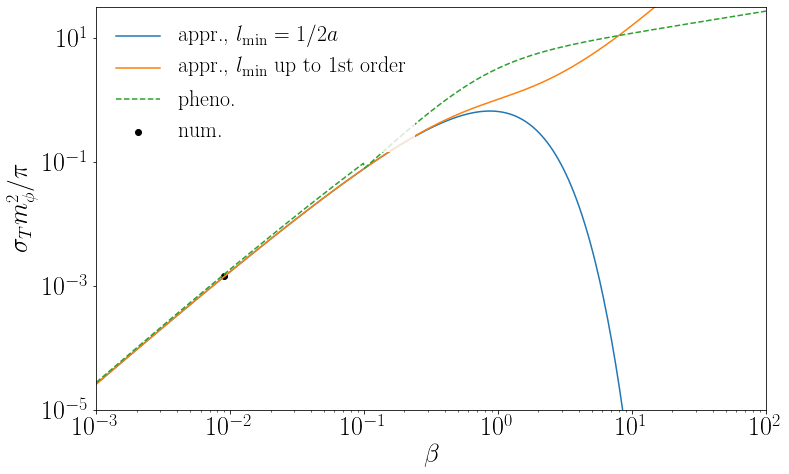

In [119]:
pl.figure(figsize=(12,12/goldenratio)) #Sophia's plot size.
pl.plot(betavals,Cappr(betavals),'-',label=r'appr.,  $l_{\rm min}=1/2a$',color='C0')
pl.plot(betavals,Cappr_higherorder(betavals),'-',label=r'appr., $l_{\rm min}$ up to 1st order',color='C1')
pl.plot(betavals,np.array([Cpheno(beta) for beta in betavals]),linestyle='--',label='pheno.',color='C2')
pl.scatter(beta,Cnum,label='num.',color='black')

pl.xscale('log')
pl.yscale('log')
pl.xlim([betamin,betamax])
pl.ylim([10.**(-5.),10.**1.5])
pl.xlabel(r'$\beta$',fontsize=fontsize) 
pl.ylabel(r'$\sigma_{T} m_{\phi}^2 / \pi$',fontsize=fontsize) 
pl.legend(loc='upper left',edgecolor='white',fontsize=legendfontsize) 
pl.savefig('Plots/C_analytical_vs_pheno.pdf',bbox_inches='tight')
print('Plots/C_analytical_vs_pheno.pdf exported.')
pl.show()

In [ ]:
pl.figure(figsize=(12,12/goldenratio)) #Sophia's plot size.
#pl.plot(betavals,Cappr(betavals),'-',label='appr.',color='C0')
pl.plot(betavals,(np.array([Cpheno(beta) for beta in betavals])-Cappr(betavals))/Cappr(betavals),linestyle='-',color='C0')
#pl.scatter(beta,(Cpheno(beta)-Cnum)/Cpheno(beta),label='num.',color='black')

pl.xscale('log')
pl.yscale('log')
pl.xlim([betamin,betamax])
pl.ylim([10.**(-3.),10.**5.])
pl.xlabel(r'$\beta$',fontsize=fontsize) 
pl.ylabel(r'$\frac{\sigma_{T,\;\rm pheno}-\sigma_{T,\;\rm appr}}{\sigma_{T,\;\rm appr}} \; m_{\phi}^2 / \pi$',fontsize=fontsize) 
pl.legend(loc='upper left',edgecolor='white',fontsize=legendfontsize) 
pl.savefig('Plots/Difference_C_analytical_vs_pheno.pdf',bbox_inches='tight')
print('Plots/Difference_C_analytical_vs_pheno.pdf exported.')
pl.show()